# **A LIRE**

**IL FAUDRAIT/ A FAIRE :**
1. VERIFIER CE QUE J AI FAIT

2. FINIR LES DIAGRAM/HIST/METRIQUES apres calibration

3. APPROFONDIR MES ANALYSES APRES CALIBRATION (logg loss, histogrames)

  4.  FAIRE UN GROS GRAPHIQUE COMME PAGE 6 DE ARTICLE AVANT/APRES CALIBRATION DES HISTOS ET DIAGRAMES
  
  5. FAIRE UN LIEN ENTRE NOTRE JEUX DE DONNEES (PLUS DE 1000obs) et les resultat des calibration comme page 7 de l'article peut etre faire meme graphique en testant plusieurs taille de jeux de données

  6. GRAPHIQUES PAGE 8 SQUARRED ERROR ET LOG LOSS AVANT APRES CALIBRATION


**LES CODES SUR LES HYPERPARAMETRES SONT TRES LONG DONC SOIT RUN TOUT MAIS CELA MET 30 MIN SOIT RUN 1 A 1 LES CELULES EN EVITANT CELLES SUR LES HYPERPARAMETRES**

# **NETTOYAGE/TRAITEMENT/ANALYSE DE LA BASE**

## LIRABRIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import PoissonRegressor
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from statsmodels.formula.api import ols
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from scipy.stats import spearmanr, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from statsmodels.api import GLM, families
from statsmodels.formula.api import glm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.genmod.families import NegativeBinomial
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import log
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian
import statsmodels.formula.api as smf
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint, uniform
from itertools import combinations
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
from functools import partial
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mode
from patsy import dmatrices, bs
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, mean_absolute_error

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.combine import SMOTETomek
from scipy.stats import randint
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pd.set_option('display.max_columns', None)

In [ ]:
!pip install xgboost

## Clients Data

### Data Loading

In [ ]:
# Load the dataset
clients = pd.read_csv("/content/clients (2) (1).csv")
print(clients.head())

# Display the data types of each column
print(clients.dtypes)

# Generate descriptive statistics for numerical columns
premium_stats = clients.describe()
print(premium_stats)

   id_client id_vehicle      id_policy  pol_bonus pol_coverage  pol_duration  \
0  A00000001        V01  A00000001-V01        0.5         Maxi            29   
1  A00000002        V01  A00000002-V01        0.5         Maxi             3   
2  A00000003        V01  A00000003-V01        0.5         Maxi             2   
3  A00000004        V01  A00000004-V01        0.5      Median2            22   
4  A00000005        V01  A00000005-V01        0.5         Maxi            16   

   pol_sit_duration pol_pay_freq pol_payd    pol_usage pol_insee_code  \
0                 9     Biannual       No      Retired          36233   
1                 1     Biannual       No      Retired          92073   
2                 2       Yearly       No  WorkPrivate          92026   
3                 1       Yearly       No  WorkPrivate          78537   
4                 4     Biannual       No      Retired          38544   

  drv_drv2  drv_age1  drv_age2 drv_sex1 drv_sex2  drv_age_lic1  drv_age_lic2  \


### Data Processing

In [ ]:
def fill_missing_weights(df, weight_column, variables):
    """
    Remplace les valeurs nulles ou égales à 0 dans une colonne de poids par la médiane calculée à partir des lignes similaires.

    Args:
        df (pd.DataFrame): Le DataFrame à traiter.
        weight_column (str): Le nom de la colonne contenant les valeurs à corriger (ex : 'vh_weight').
        variables (list): La liste des variables à combiner pour rechercher des lignes similaires (ex : ['vh_make', 'vh_model', ...]).

    Returns:
        pd.DataFrame: Le DataFrame avec les valeurs corrigées.
    """
    # Sélectionner les lignes où le poids est nul ou égal à 0
    zero_weight_rows = df[df[weight_column] == 0]

    # Générer toutes les combinaisons possibles de variables (de la plus spécifique à la plus générale)
    variables_to_check = []
    for r in range(len(variables), 1, -1):
        variables_to_check.extend(list(combinations(variables, r)))

    # Parcourir chaque ligne où le poids est nul
    for idx, row in zero_weight_rows.iterrows():
        median_weight = None

        # Essayer chaque combinaison de variables jusqu'à trouver une correspondance
        for variable_set in variables_to_check:
            condition = (df[weight_column] > 0)
            for var in variable_set:
                condition &= (df[var] == row[var])

            similar_vehicles = df[condition]

            if not similar_vehicles.empty:
                median_weight = similar_vehicles[weight_column].median()
                break

        # Remplacer la valeur si une médiane a été trouvée
        if median_weight is not None:
            # Ensure the column can hold float values if necessary
            df[weight_column] = df[weight_column].astype(float)

            # Assign the value without causing type incompatibility
            df.at[idx, weight_column] = float(median_weight)

    return df

In [ ]:
# Number of rows in the dataset
nb_clients = clients.shape[0]
print(f"Number of rows in 'clients': {nb_clients}\n")

# Check for duplicate rows in the entire dataset
duplicates_premium = clients[clients.duplicated()]
print(f"Number of duplicate rows in 'clients': {len(duplicates_premium)}\n")

# Check for duplicate rows based on 'id_client' and 'id_vehicle'
duplicates_premium_2 = clients[clients[["id_client", "id_vehicle"]].duplicated()]
print(f"Number of duplicate rows based on 'id_client' and 'id_vehicle': {len(duplicates_premium_2)}\n")

# Check for missing (NaN) values before treatment
print("Missing values before treatment:\n")
print(clients.isnull().sum(), "\n")

# Fill NaN values in 'drv_sex2' column with a default string
clients['drv_sex2'] = clients['drv_sex2'].fillna("No second driver")

# Remove rows with NaN values in 'vh_age'
clients = clients.dropna(subset=['vh_age'])
print("Missing values after treatment:\n")
print(clients.isnull().sum(), "\n")

# Check for zero values before treatment
print("Zero values before treatment:\n")
print((clients == 0).sum(), "\n")

# Fill missing weights based on specified variables
variables = ['vh_make', 'vh_cyl', 'vh_fuel', 'vh_din']
clients = fill_missing_weights(clients, 'vh_weight', variables)

variables = ['vh_make', 'vh_weight', 'vh_fuel', 'vh_din']
clients = fill_missing_weights(clients, 'vh_cyl', variables)

# Remove rows where 'vh_weight' is zero
clients = clients[clients["vh_weight"] != 0]
print("Zero values after treatment:\n")
print((clients == 0).sum(), "\n")

# Data consistency checks
# Check for invalid 'pol_bonus' values
bonus_issues = clients[(clients['pol_bonus'] < 0.5) | (clients['pol_bonus'] > 3.5)]['pol_bonus'] # En effet, on sait que dans le système français les CRM sont compris entre 0.5 et 3.5 même si ci la valeur max est 2.16
print("Invalid 'pol_bonus' values:\n", bonus_issues, "\n")

# Check for drivers under the legal age (less than 18 years)
age_issues = clients[clients['drv_age1'] < 18]['drv_age1']
print("Drivers below the age of 18:\n", age_issues, "\n")

# Check for license age inconsistencies for the primary driver
license_age_issues = clients[(clients['drv_age1'] - clients['drv_age_lic1']) < 18][['drv_age1', 'drv_age_lic1']]
print("Primary driver with license age inconsistency:\n", license_age_issues, "\n")

# Remove rows with license age inconsistencies for the primary driver
clients = clients[~((clients['drv_age1'] - clients['drv_age_lic1']) < 18)]

# Check for secondary drivers below the legal age (less than 18 years)
age_issues_secondary = clients[(clients['drv_age2'] < 18) & (clients['drv_drv2'] == "Yes")]['drv_age2']
print("Secondary drivers below the age of 18:\n", age_issues_secondary, "\n")

# Check for license age inconsistencies for the secondary driver
license_age_issues_secondary = clients[((clients['drv_age2'] - clients['drv_age_lic2']) < 18) & (clients['drv_drv2'] == "Yes")][['drv_age2', 'drv_age_lic2']]
print("Secondary driver with license age inconsistency:\n", license_age_issues_secondary, "\n")

# Remove rows with license age inconsistencies for the secondary driver
clients = clients[~(((clients['drv_age2'] - clients['drv_age_lic2']) < 18) & (clients['drv_drv2'] == "Yes"))]

# Check for contracts with inconsistent durations
contract_duration_issues = clients[(clients['pol_duration'] == 0) & (clients['pol_sit_duration'] > 0)]
print("Contracts with inconsistent durations:\n", contract_duration_issues, "\n")

# remove columns dont understand
clients = clients.drop(columns=[ "pol_sit_duration"])

# Number of rows in the dataset after traitement
nb_clients = clients.shape[0]
print(f"Number of rows in 'clients': {nb_clients}\n")

Number of rows in 'clients': 50000

Number of duplicate rows in 'clients': 0

Number of duplicate rows based on 'id_client' and 'id_vehicle': 0

Missing values before treatment:

id_client               0
id_vehicle              0
id_policy               0
pol_bonus               0
pol_coverage            0
pol_duration            0
pol_sit_duration        0
pol_pay_freq            0
pol_payd                0
pol_usage               0
pol_insee_code          0
drv_drv2                0
drv_age1                0
drv_age2                0
drv_sex1                0
drv_sex2            33406
drv_age_lic1            0
drv_age_lic2            0
vh_age                  1
vh_cyl                  0
vh_din                  0
vh_fuel                 0
vh_make                 0
vh_model                0
vh_sale_begin           0
vh_sale_end             0
vh_speed                0
vh_type                 0
vh_value                0
vh_weight               0
dtype: int64 

Missing values after treat

### Univariate Analysis

#### Categorical

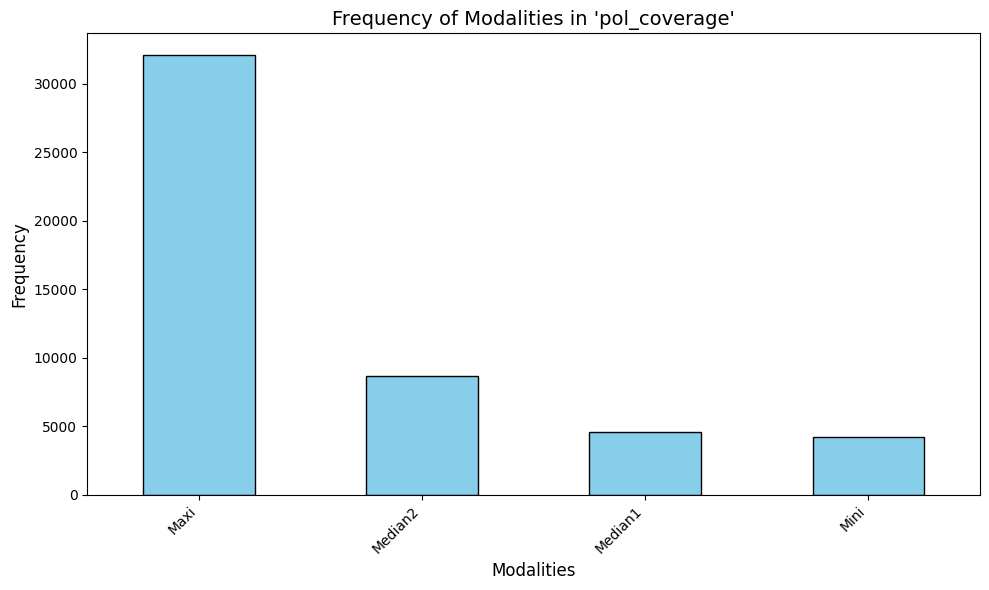

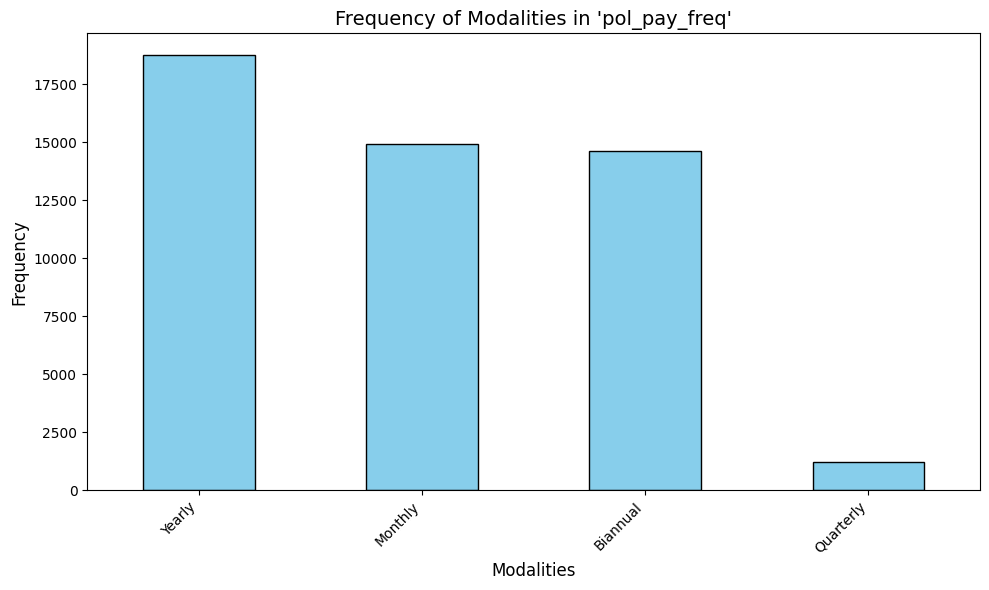

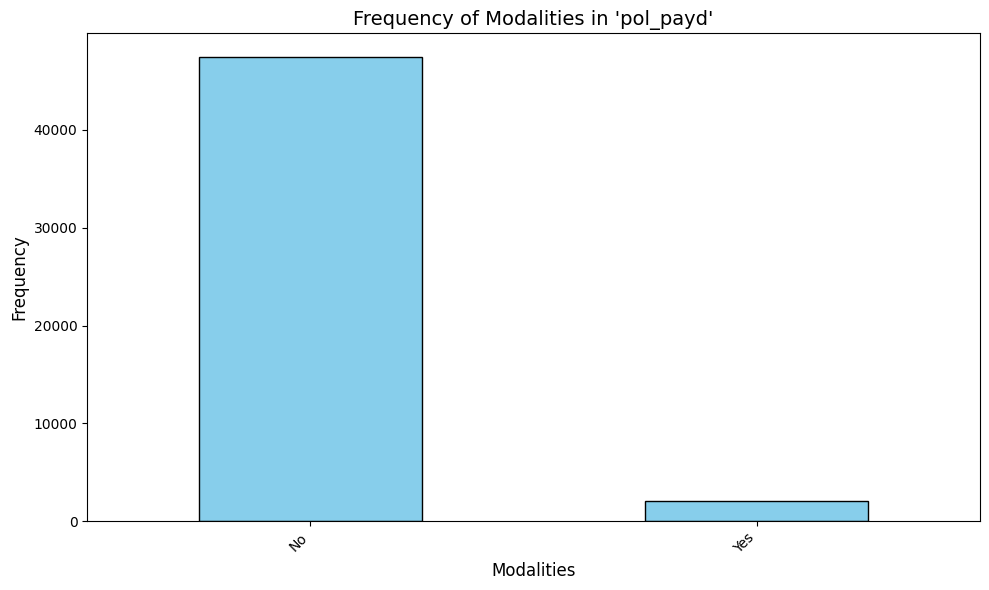

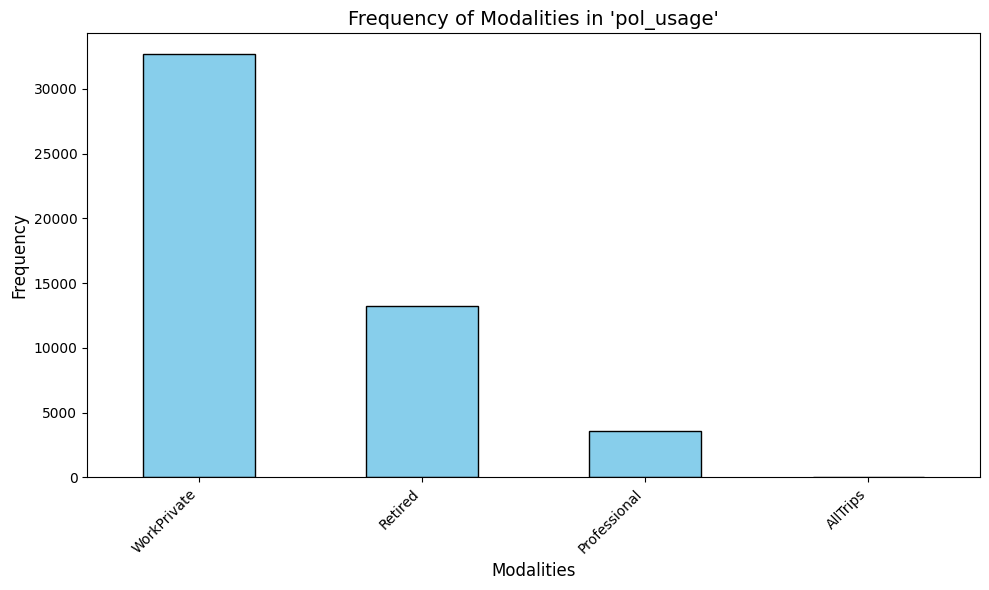

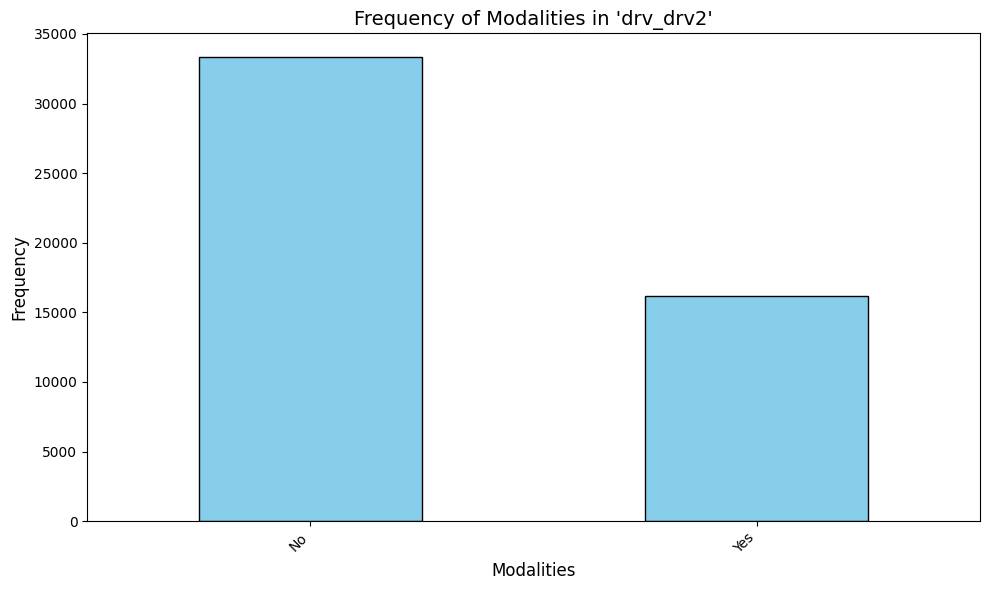

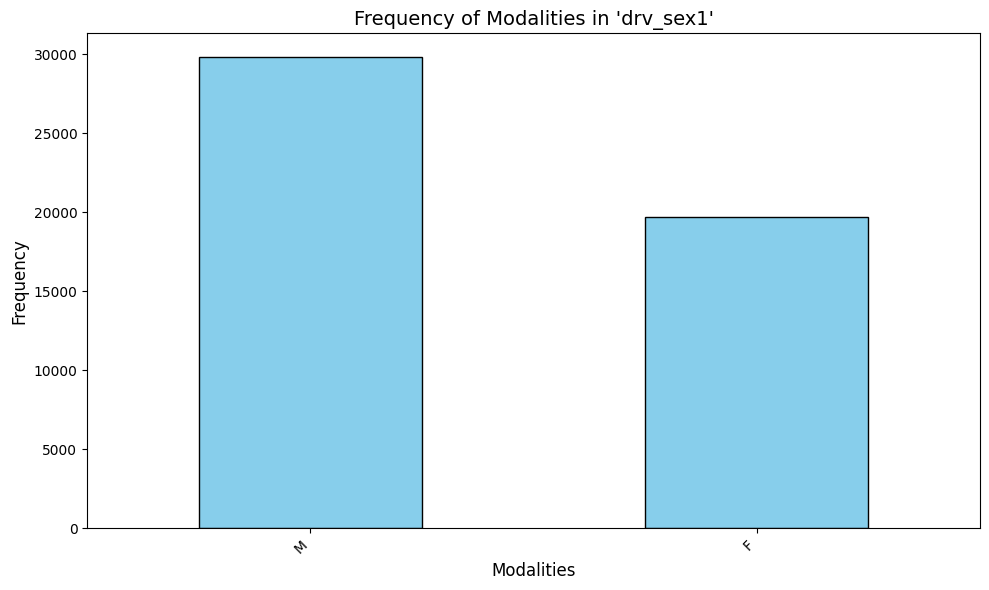

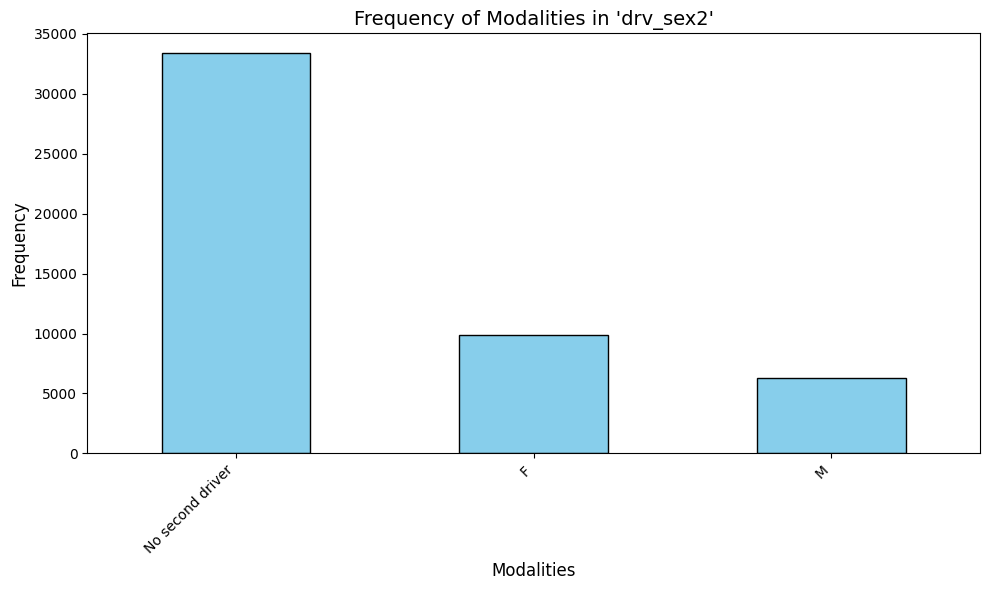

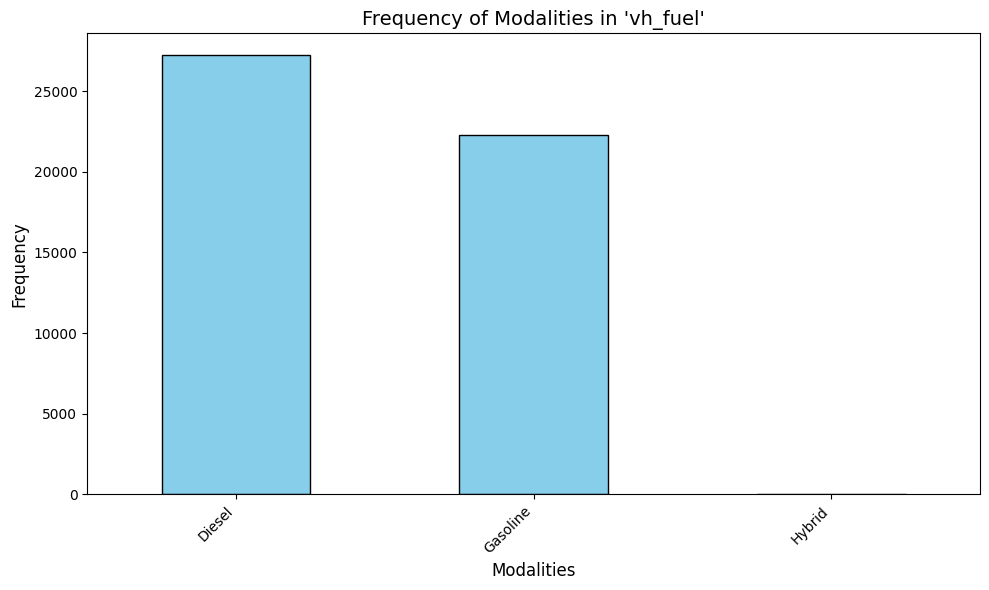

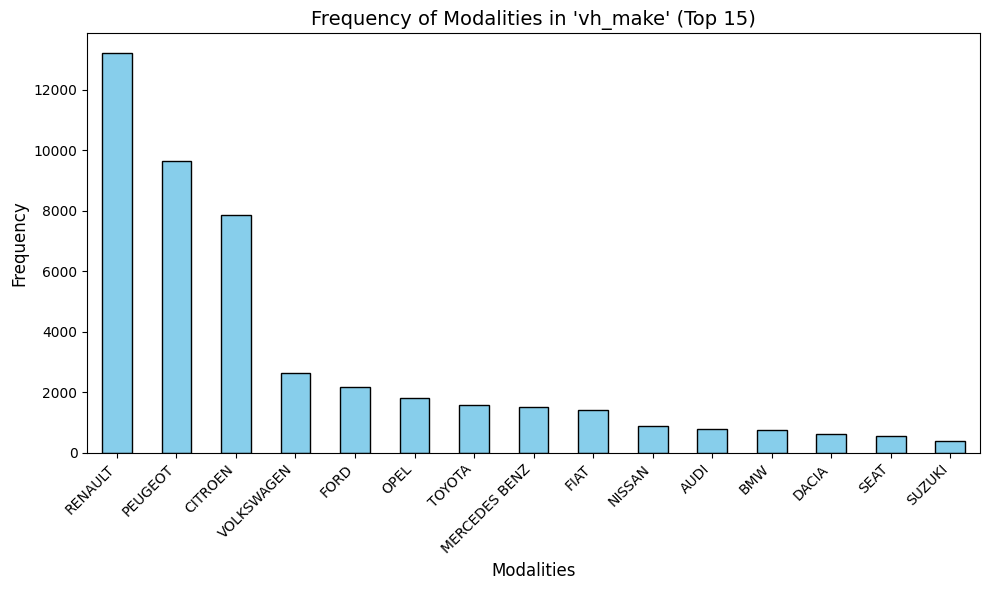

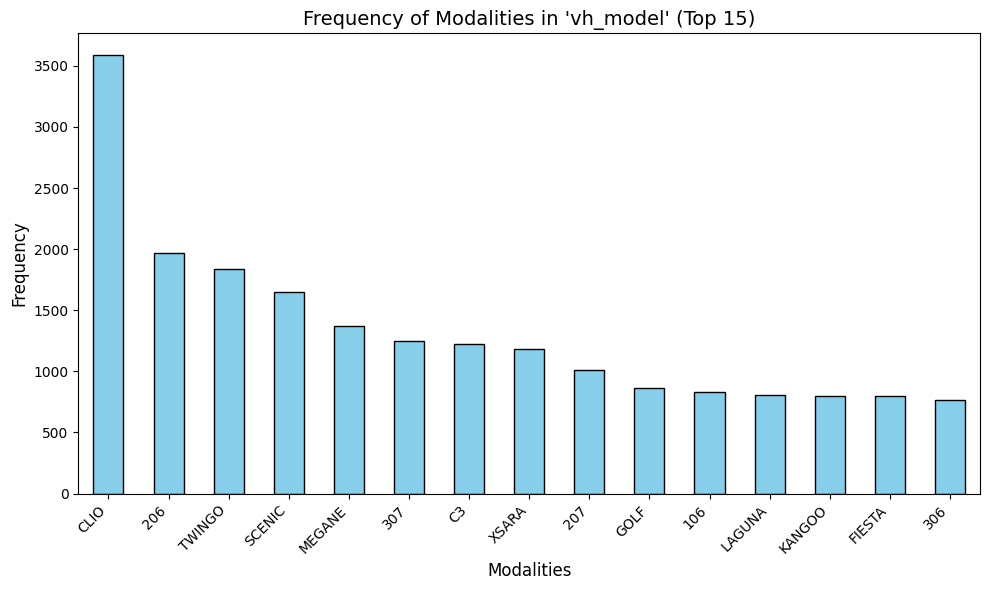

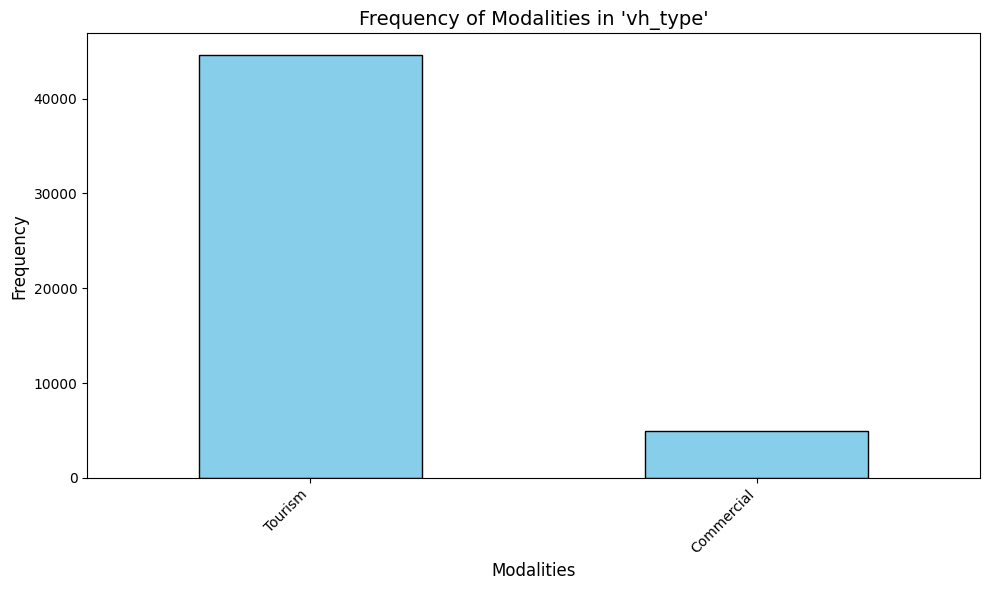

In [ ]:
# List of columns to exclude
exclude_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code"]

# Columns for which we limit modalities
limit_columns = ["vh_make", "vh_model"]
TOP_N = 15  # cela permet d'éviter d'avoir un graphique illisible pour ces deux colonnes qui contiennent de nombreuses modalités

# Loop through categorical columns
for col in clients.select_dtypes(include=["object", "category"]).columns:
    if col not in exclude_columns:

        # Calculate frequency
        freq = clients[col].value_counts()

        # Apply limitation only for specific columns
        if col in limit_columns:
            freq = freq.head(TOP_N)

        # Plot
        plt.figure(figsize=(10, 6))
        freq.plot(kind="bar", color="skyblue", edgecolor="black")

        # Titles and labels
        title_suffix = f" (Top {TOP_N})" if col in limit_columns else ""
        plt.title(f"Frequency of Modalities in '{col}'{title_suffix}", fontsize=14)
        plt.xlabel("Modalities", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)

        # Rotate x-axis labels
        plt.xticks(rotation=45, ha="right")

        plt.tight_layout()
        plt.show()

#### Numerical

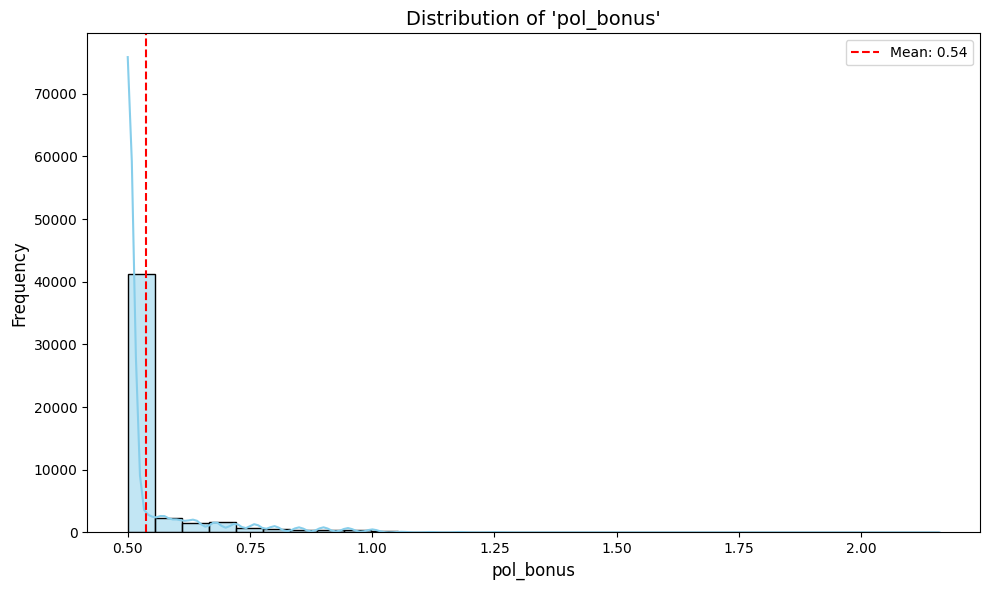

Outliers detected in 'pol_bonus' (sorted in descending order):
36282    2.16
6658     1.65
3383     1.65
6474     1.57
44123    1.56
         ... 
43594    0.51
4639     0.51
43532    0.51
21812    0.51
49778    0.51
Name: pol_bonus, Length: 10983, dtype: float64 



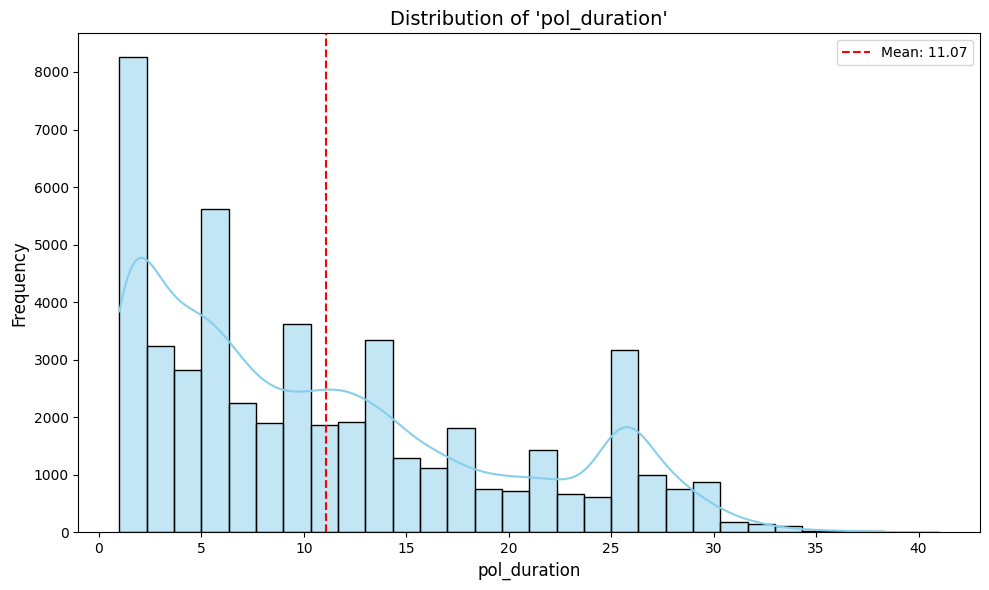

Outliers detected in 'pol_duration' (sorted in descending order):
46917    41
1921     40
17055    39
29121    39
21048    38
         ..
41037    35
43683    35
45201    35
48584    35
49882    35
Name: pol_duration, Length: 82, dtype: int64 



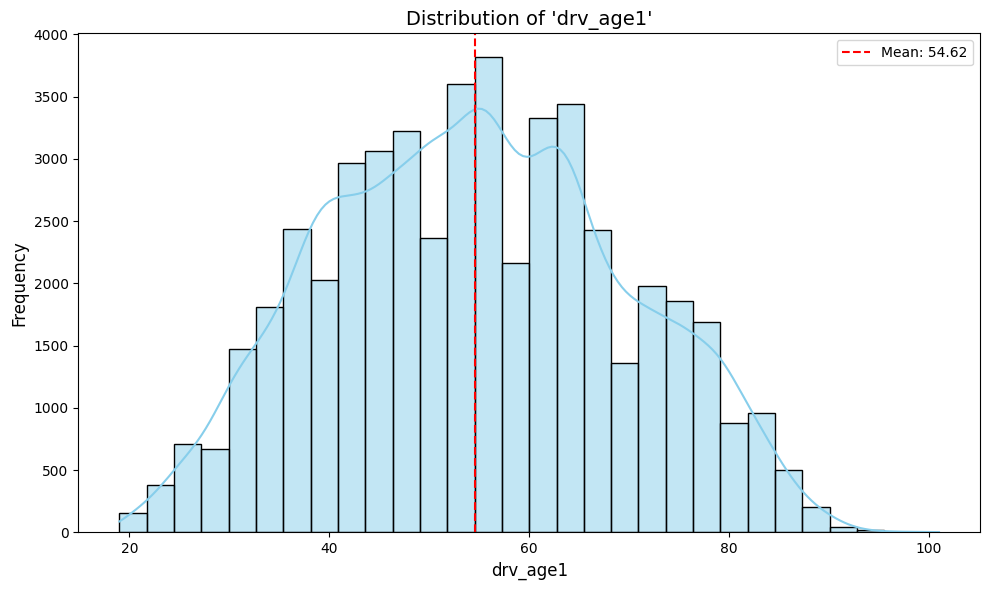

Outliers detected in 'drv_age1' (sorted in descending order):
6851     101
7586     100
18238    100
28814    100
47783     99
Name: drv_age1, dtype: int64 



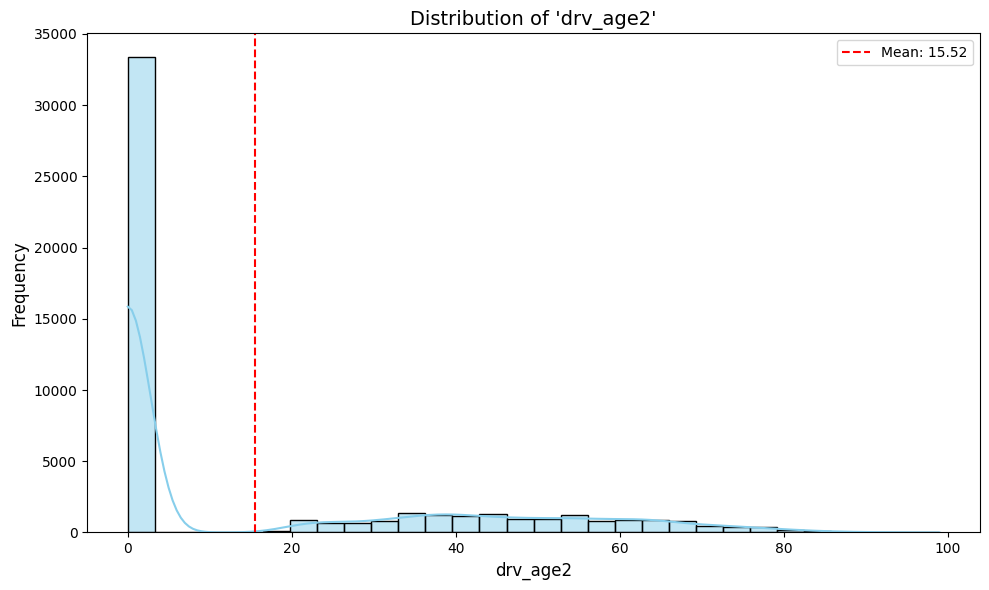

Outliers detected in 'drv_age2' (sorted in descending order):
29425    99
27727    98
30436    95
49888    94
7586     94
30940    93
25901    92
16355    92
26615    92
5656     92
13416    92
41546    91
14388    91
11604    91
42739    91
47793    91
45369    91
46008    91
15398    90
39179    90
48311    90
33651    90
31800    90
42176    89
47328    89
26766    89
33236    89
12285    89
4777     89
4778     89
11087    89
32447    89
39555    89
46748    89
12286    89
22513    88
18542    88
17573    88
16839    88
14128    88
7161     88
4589     88
30886    88
39192    88
31628    88
42984    88
42187    88
48137    88
48743    88
48747    88
49198    88
Name: drv_age2, dtype: int64 



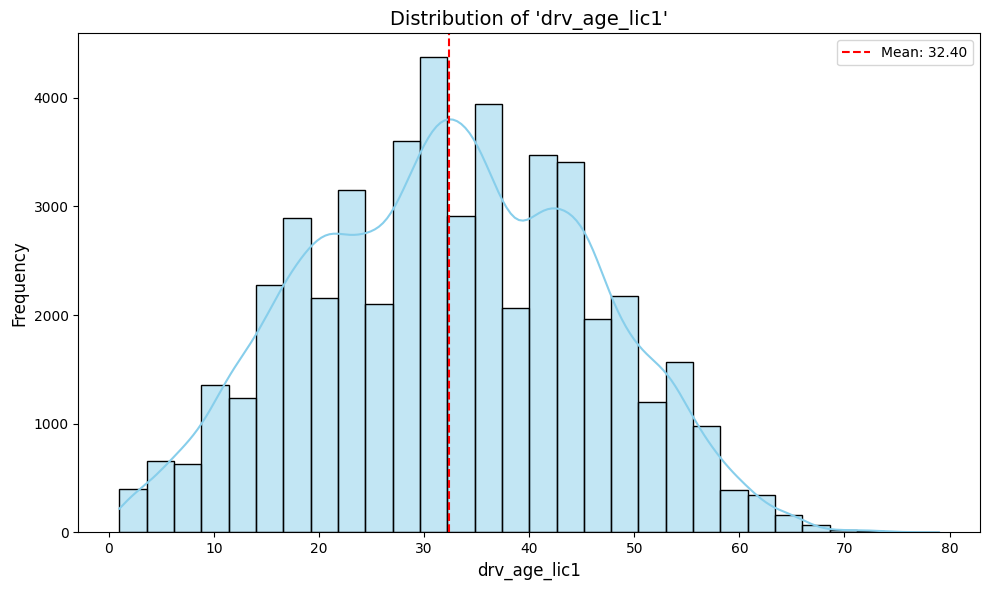

Outliers detected in 'drv_age_lic1' (sorted in descending order):
47783    79
40476    77
42180    76
41885    75
35143    75
7586     74
7873     74
3190     73
23019    73
18238    73
45963    73
Name: drv_age_lic1, dtype: int64 



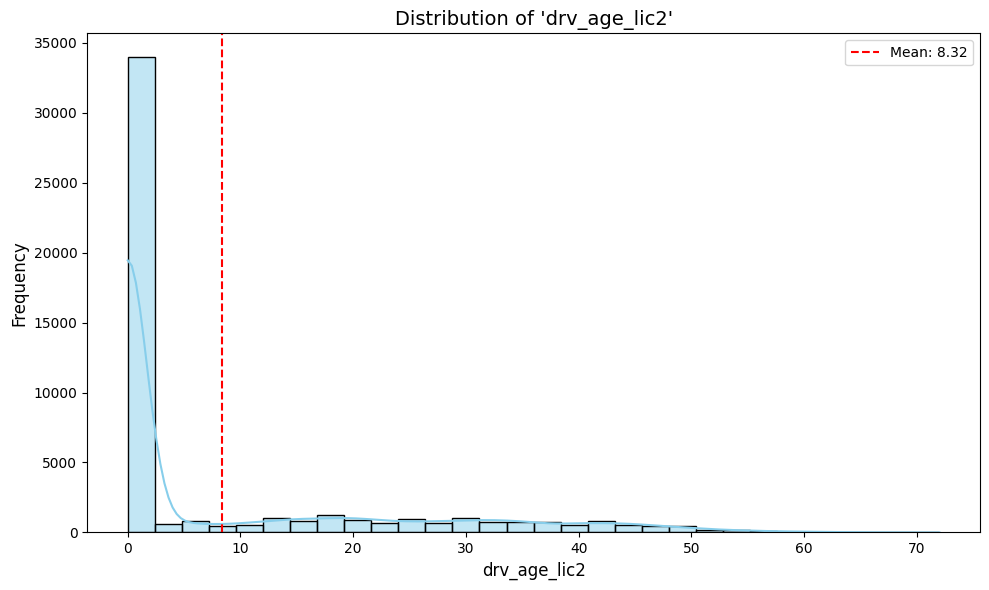

Outliers detected in 'drv_age_lic2' (sorted in descending order):
16355    72
42176    71
46573    69
15323    66
6915     66
         ..
46231    36
46148    36
46056    36
5338     36
30437    36
Name: drv_age_lic2, Length: 4225, dtype: int64 



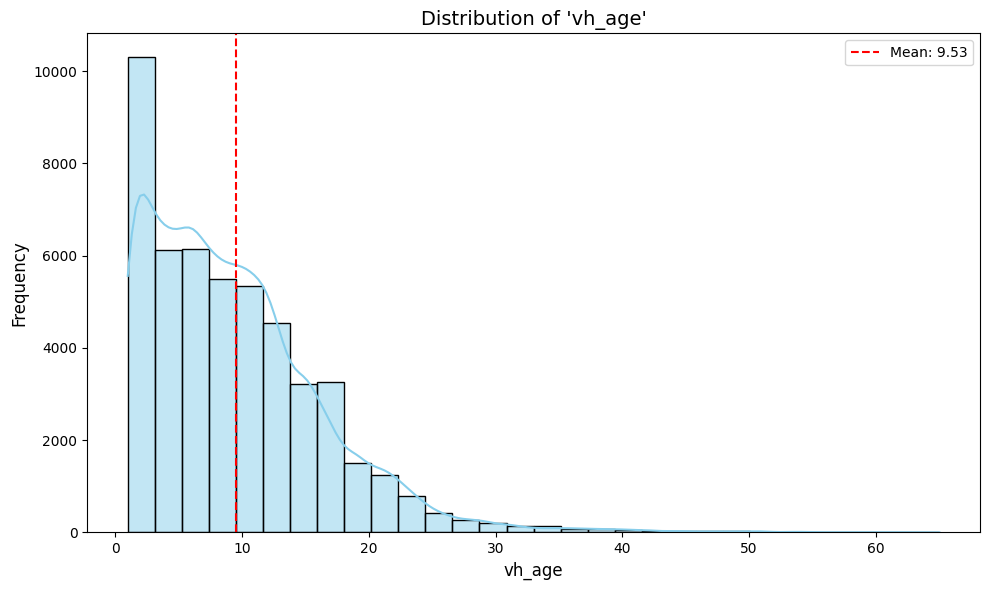

Outliers detected in 'vh_age' (sorted in descending order):
23564    65.0
42819    64.0
18064    63.0
49247    63.0
26058    61.0
         ... 
49479    27.0
49455    27.0
685      27.0
638      27.0
49991    27.0
Name: vh_age, Length: 1115, dtype: float64 



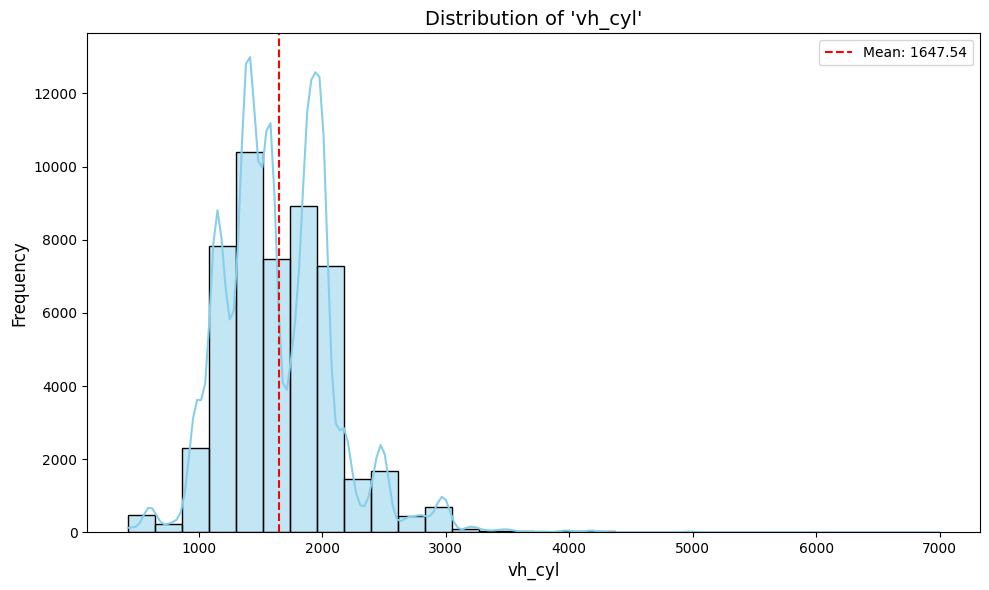

Outliers detected in 'vh_cyl' (sorted in descending order):
3534     6997.0
1417     6761.0
21473    6500.0
19123    6332.0
24228    6217.0
          ...  
33385     425.0
34288     425.0
4225      425.0
48751     425.0
36140     425.0
Name: vh_cyl, Length: 1352, dtype: float64 



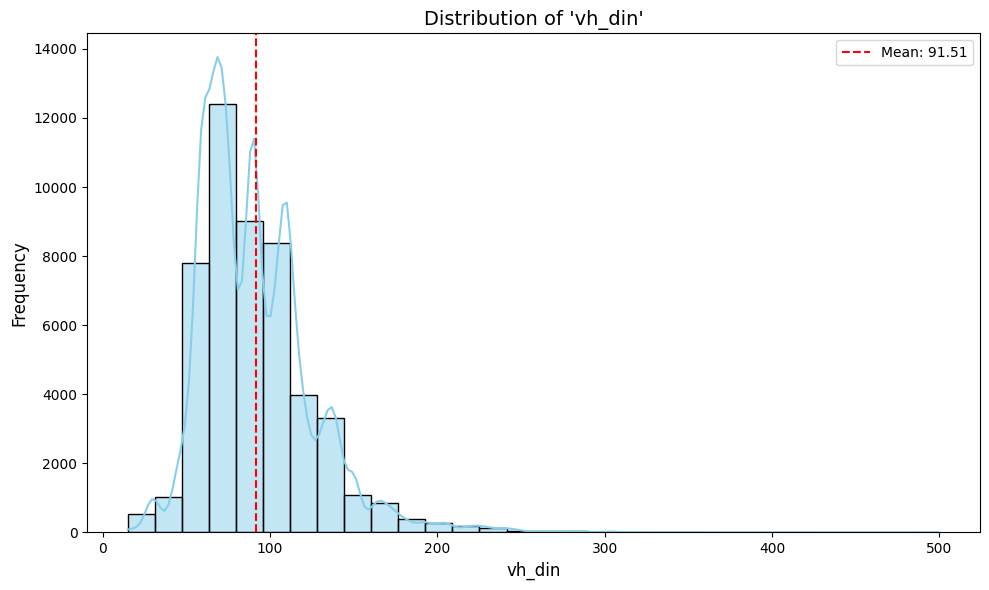

Outliers detected in 'vh_din' (sorted in descending order):
21821    500
774      486
24533    450
27229    420
41118    416
        ... 
13491    172
47913    172
8432     172
1955     172
3739     172
Name: vh_din, Length: 1274, dtype: int64 



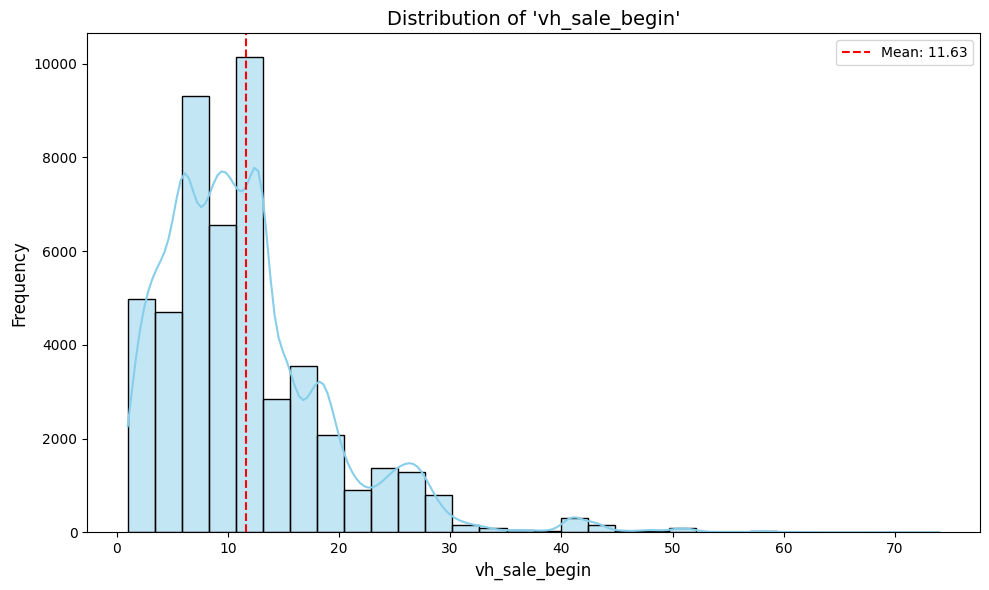

Outliers detected in 'vh_sale_begin' (sorted in descending order):
7906     74
16792    74
23564    71
15409    69
2155     69
         ..
1582     29
26903    29
26837    29
26486    29
26426    29
Name: vh_sale_begin, Length: 1391, dtype: int64 



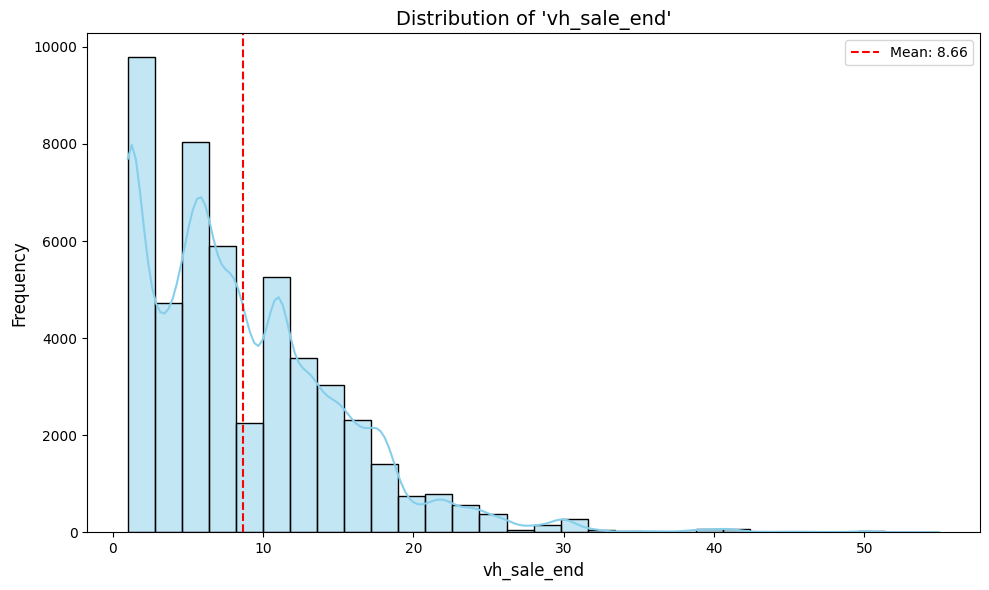

Outliers detected in 'vh_sale_end' (sorted in descending order):
38905    55
9993     55
49873    55
16792    54
7906     54
         ..
9649     25
49455    25
685      25
173      25
49991    25
Name: vh_sale_end, Length: 1170, dtype: int64 



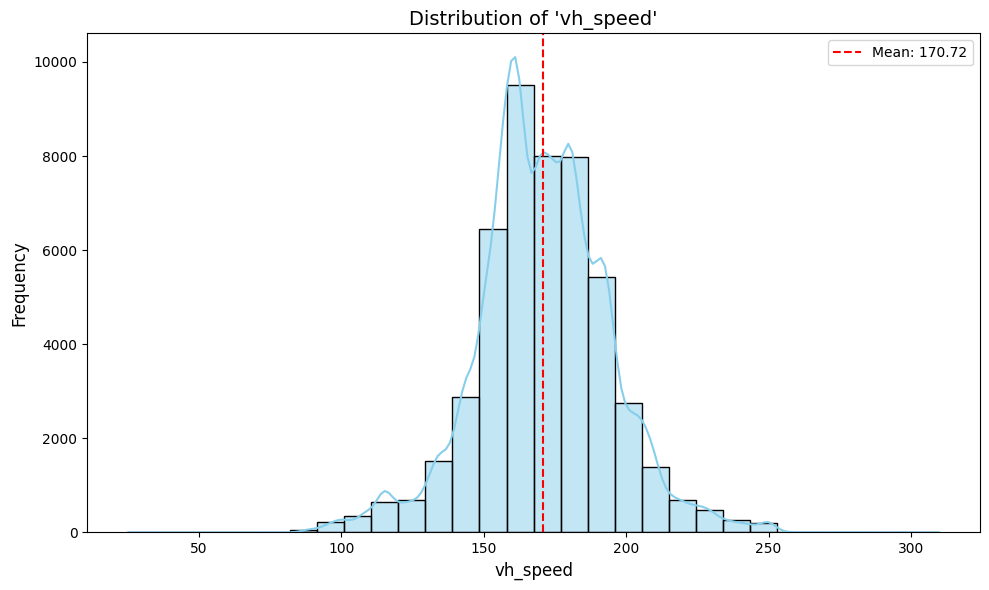

Outliers detected in 'vh_speed' (sorted in descending order):
774      310
27229    301
34785    300
6754     295
3546     293
        ... 
25540     88
22554     88
21966     85
41750     75
12336     25
Name: vh_speed, Length: 1447, dtype: int64 



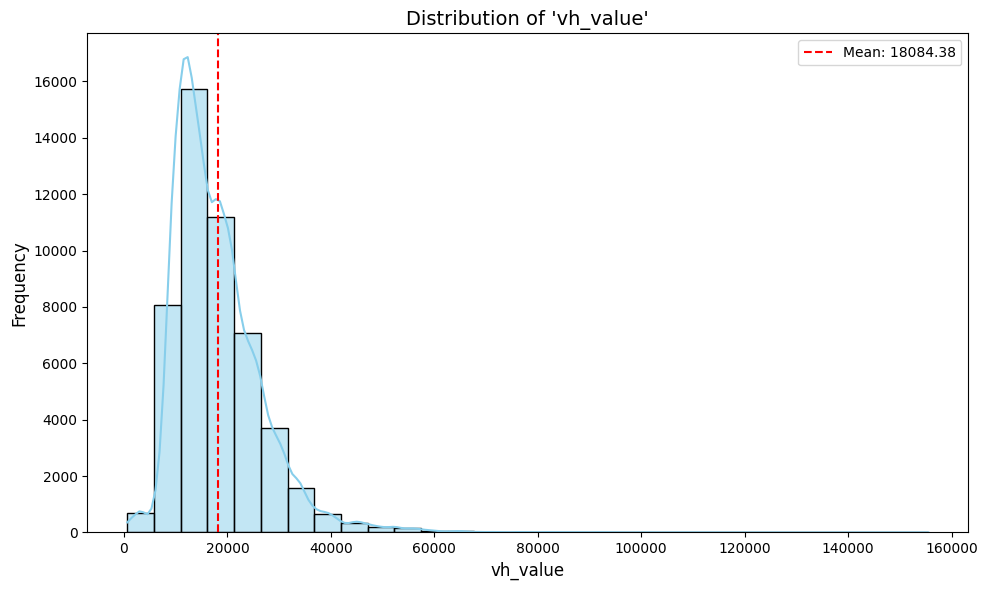

Outliers detected in 'vh_value' (sorted in descending order):
1417     155498
21821    145000
41118    124948
27229    120400
23958    117386
          ...  
6686      37411
29885     37400
44014     37400
46168     37400
7280      37396
Name: vh_value, Length: 1442, dtype: int64 



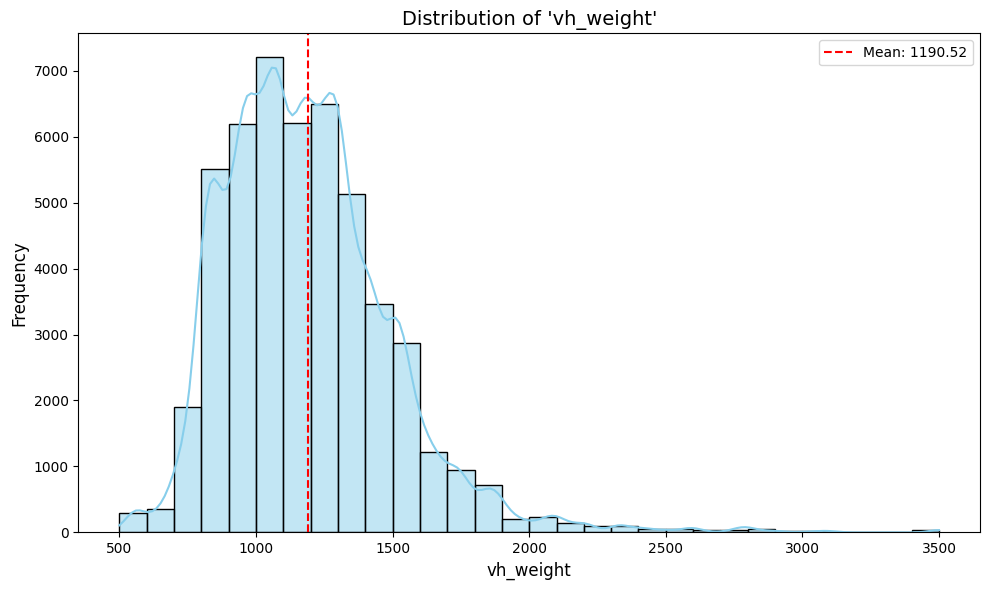

Outliers detected in 'vh_weight' (sorted in descending order):
48956    3500.0
24888    3500.0
11979    3500.0
15235    3500.0
34960    3500.0
          ...  
15404    1922.0
46150    1922.0
31346    1922.0
103      1922.0
44828    1920.0
Name: vh_weight, Length: 1064, dtype: float64 



In [ ]:
# Loop through all numerical columns in the DataFrame
for col in clients.select_dtypes(include=["number"]).columns:
    # Create a histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(clients[col], kde=True, bins=30, color="skyblue", edgecolor="black")

    # Add a vertical line for the mean
    mean_val = clients[col].mean()
    plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.2f}")

    # Set the title and labels
    plt.title(f"Distribution of '{col}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # Display the legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Detect potential outliers using the 1.5 IQR rule
    q1 = clients[col].quantile(0.25)  # First quartile
    q3 = clients[col].quantile(0.75)  # Third quartile
    iqr = q3 - q1                     # Interquartile range
    lower_bound = q1 - 1.5 * iqr      # Lower bound for outliers
    upper_bound = q3 + 1.5 * iqr      # Upper bound for outliers

    # Identify and sort outliers
    outliers = clients[(clients[col] < lower_bound) | (clients[col] > upper_bound)][col]
    sorted_outliers = outliers.sort_values(ascending=False)

    # Print outlier details in descending order
    print(f"Outliers detected in '{col}' (sorted in descending order):")
    print(sorted_outliers, "\n")


### Bivariate Analysis

#### Numerical

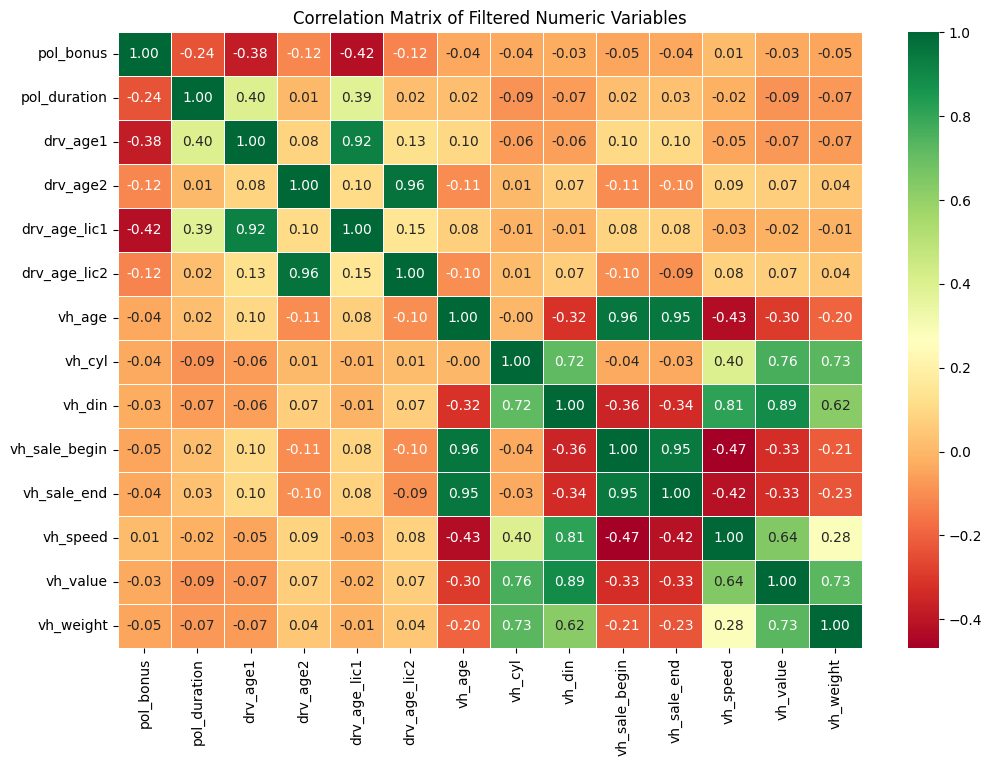

Highly positively correlated pairs (correlation > 0.9):
drv_age2       drv_age_lic2     0.963018
drv_age_lic2   drv_age2         0.963018
vh_age         vh_sale_begin    0.959016
vh_sale_begin  vh_age           0.959016
vh_sale_end    vh_age           0.948885
vh_age         vh_sale_end      0.948885
vh_sale_end    vh_sale_begin    0.948079
vh_sale_begin  vh_sale_end      0.948079
drv_age1       drv_age_lic1     0.920589
drv_age_lic1   drv_age1         0.920589
vh_din         vh_value         0.887027
vh_value       vh_din           0.887027
vh_speed       vh_din           0.810864
vh_din         vh_speed         0.810864
vh_value       vh_cyl           0.764503
vh_cyl         vh_value         0.764503
               vh_weight        0.729109
vh_weight      vh_cyl           0.729109
               vh_value         0.727407
vh_value       vh_weight        0.727407
vh_din         vh_cyl           0.715052
vh_cyl         vh_din           0.715052
vh_value       vh_speed         0.640465
v

In [ ]:
# List of columns to exclude
columns_to_exclude = []

# Select only numeric columns from the DataFrame
numeric_columns = clients.select_dtypes(include=['float64', 'int64'])

# Drop excluded columns
filtered_numeric_columns = numeric_columns.drop(columns=columns_to_exclude, errors='ignore')

# Compute the correlation matrix for the filtered numeric DataFrame
correlation_matrix = filtered_numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', cbar=True, linewidths=0.5)
plt.title("Correlation Matrix of Filtered Numeric Variables")
plt.show()

# Identify highly correlated pairs (absolute value > 0.6, excluding self-correlation)
high_corr_pairs = correlation_matrix.stack()[
    (correlation_matrix.stack().abs() > 0.6) & (correlation_matrix.stack() != 1)
]

# Separate positively and negatively correlated pairs
positively_corr_pairs = high_corr_pairs[high_corr_pairs > 0]
negatively_corr_pairs = high_corr_pairs[high_corr_pairs < 0]

# Display highly positively correlated pairs
print("Highly positively correlated pairs (correlation > 0.9):")
print(positively_corr_pairs.sort_values(ascending=False))

# Display highly negatively correlated pairs (correlation < -0.7)
print("\nHighly negatively correlated pairs (correlation < -0.7):")
print(negatively_corr_pairs.sort_values())

#### Categorical

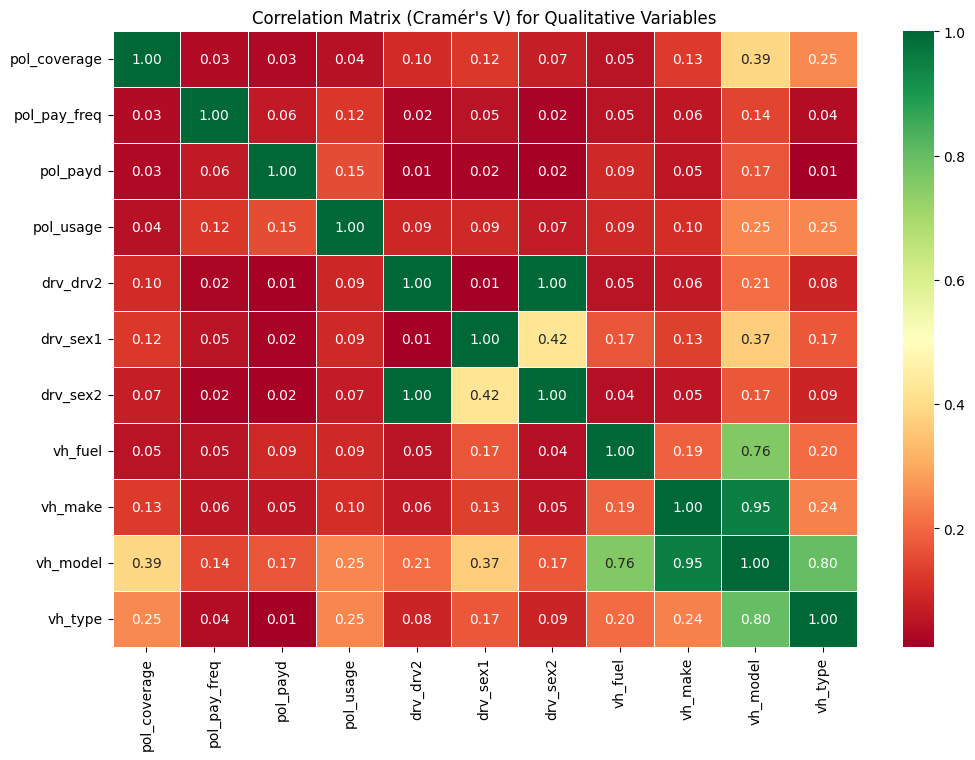

Significant pairs with Cramér's V > 0.6:
    Variable 1 Variable 2  Cramér's V
50    drv_drv2   drv_sex2    1.000000
70    drv_sex2   drv_drv2    1.000000
97     vh_make   vh_model    0.952310
107   vh_model    vh_make    0.952310
119    vh_type   vh_model    0.802244
109   vh_model    vh_type    0.802244
86     vh_fuel   vh_model    0.756386
106   vh_model    vh_fuel    0.756386


In [ ]:
# Function to calculate Cramer's V
def cramers_v(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:  # Check if the contingency table is valid
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()  # Total sample size
        r, k = contingency_table.shape
        return np.sqrt(chi2 / (n * (min(r, k) - 1)))  # Calculate Cramer's V
    else:
        return np.nan  # Return NaN if the table is not valid

# List of columns to exclude
columns_to_exclude = ["id_client", "id_vehicle", "id_policy", "pol_insee_code"]

# Filter qualitative columns
categorical_columns = clients.select_dtypes(include=['object', 'category']).columns
filtered_columns = [col for col in categorical_columns if col not in columns_to_exclude]

# Create an empty matrix to store correlation coefficients
correlation_matrix = pd.DataFrame(index=filtered_columns, columns=filtered_columns, dtype=float)

# Calculate Cramér's V for all pairs of qualitative variables
for col1 in filtered_columns:
    for col2 in filtered_columns:
        if col1 == col2:
            correlation_matrix.loc[col1, col2] = 1.0  # The diagonal is always 1 (perfect correlation with itself)
        elif pd.isna(correlation_matrix.loc[col1, col2]):
            corr_value = cramers_v(clients, col1, col2)
            correlation_matrix.loc[col1, col2] = corr_value
            correlation_matrix.loc[col2, col1] = corr_value  # Ensure symmetry

# Replace NaN with 0 to avoid display issues
correlation_matrix.fillna(0, inplace=True)

# Visualize the correlation matrix (Cramér's V)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, fmt='.2f', cmap='RdYlGn', cbar=True, linewidths=0.5)
plt.title("Correlation Matrix (Cramér's V) for Qualitative Variables")
plt.show()

# Display pairs with significant correlation (> 0.7 for example)
significant_pairs = correlation_matrix.stack().reset_index()
significant_pairs.columns = ['Variable 1', 'Variable 2', "Cramér's V"]
significant_pairs = significant_pairs[
    (significant_pairs["Cramér's V"] > 0.7) & (significant_pairs["Variable 1"] != significant_pairs["Variable 2"])
]

print("Significant pairs with Cramér's V > 0.6:")
print(significant_pairs.sort_values(by="Cramér's V", ascending=False))


## Claims Data

### Data Loading

In [ ]:
claims = pd.read_csv("/content/sinistres (2).csv")
claims.head()

print(claims.dtypes)

claims_stats = claims.describe()
print(claims_stats)

id_client        object
id_vehicle       object
id_claim         object
claim_amount    float64
dtype: object
       claim_amount
count   7255.000000
mean     780.967910
std     1179.735702
min    -1863.920000
25%      116.850000
50%      467.230000
75%     1175.525000
max    21826.960000


### Data Processing

In [ ]:
# Number of line
nb_claims = claims.shape[0]
print(f"Nombre de lignes dans claims : {nb_claims}")

# duplicats
duplicates_claims = claims[claims.duplicated()]
print(f'Duplicates in claims data: {len(duplicates_claims)}')

# duplicated ID Claims
duplicates_claims_2 = claims[claims["id_claim"].duplicated()]
print(f'Duplicates in id_claim data: {len(duplicates_claims_2)}')

# NaN Value
print(claims.isnull().sum())

# Zero Value
print((claims == 0).sum())

claims[claims["claim_amount"]<=0]
# amount == 0: claim without follow-up? Claims < deductible?
# amount < 0: excess compensation?
### Decision: Consideration for the Frequency model but exclusion for the Cost model

Nombre de lignes dans claims : 7255
Duplicates in claims data: 0
Duplicates in id_claim data: 7249
id_client       0
id_vehicle      0
id_claim        0
claim_amount    0
dtype: int64
id_client         0
id_vehicle        0
id_claim          0
claim_amount    316
dtype: int64


,id_client,id_vehicle,id_claim,claim_amount
6,A00000072,V01,CL01,-477.91
7,A00000076,V01,CL01,-991.69
37,A00000271,V01,CL01,0.00
43,A00000299,V02,CL02,-622.53
46,A00000320,V01,CL01,0.00
...,...,...,...,...
7216,A00045522,V01,CL01,-851.27
7231,A00045626,V01,CL01,0.00
7233,A00045638,V01,CL01,-562.41
7236,A00045694,V01,CL01,-1119.31


## Model Base

##**Frequency base**

#### Created

Aggregation des deux bases par id_client et id_vehicule

In [ ]:
# Group by id_client, id_client_id_vehicle, and id_claim
claims_by_client = claims.groupby(['id_client','id_vehicle']).agg(
    claim_count=('id_claim', 'count')).reset_index()

# Perform a join between claims_agg and clients on id_client_id_vehicle and id_policy
freq_base  = clients.merge(
    claims_by_client,
    how='left',
    on=['id_client','id_vehicle'],
)

# Replace NaN values with zero
freq_base["claim_count"] = freq_base["claim_count"].fillna(0)

print(f"Nombre de lignes : {freq_base.shape[0]}")
print(freq_base["claim_count"].value_counts())
print(freq_base.columns)

Nombre de lignes : 49560
claim_count
0.0    43216
1.0     5622
2.0      638
3.0       71
4.0       12
6.0        1
Name: count, dtype: int64
Index(['id_client', 'id_vehicle', 'id_policy', 'pol_bonus', 'pol_coverage',
       'pol_duration', 'pol_pay_freq', 'pol_payd', 'pol_usage',
       'pol_insee_code', 'drv_drv2', 'drv_age1', 'drv_age2', 'drv_sex1',
       'drv_sex2', 'drv_age_lic1', 'drv_age_lic2', 'vh_age', 'vh_cyl',
       'vh_din', 'vh_fuel', 'vh_make', 'vh_model', 'vh_sale_begin',
       'vh_sale_end', 'vh_speed', 'vh_type', 'vh_value', 'vh_weight',
       'claim_count'],
      dtype='object')


#### Analyzed

freq_base est la fusion de ces deux bases, on compte la frequence de 0 sinistre, 1 sinistres ... pour chaque assurés.

Calcul de la fréquence de la survenue d'un sinistre en fonction de la durée dans le portefeuille (variable pol_duration) et analyse du lien entre cette nouvelle variable créee et les autres variables.

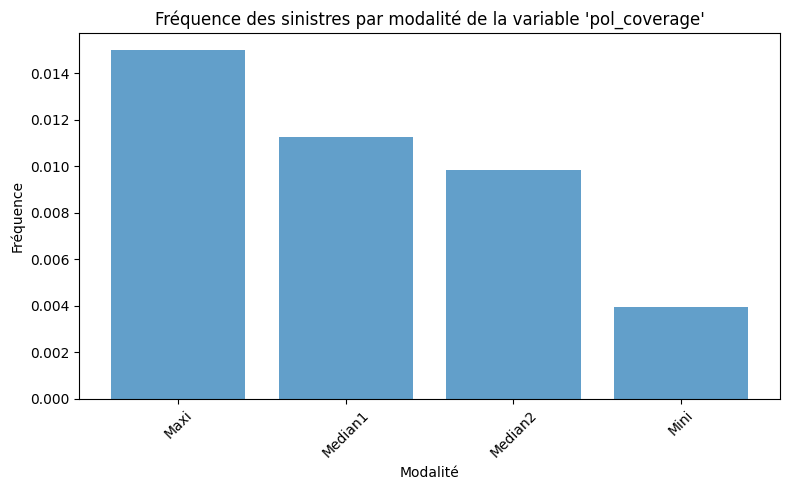

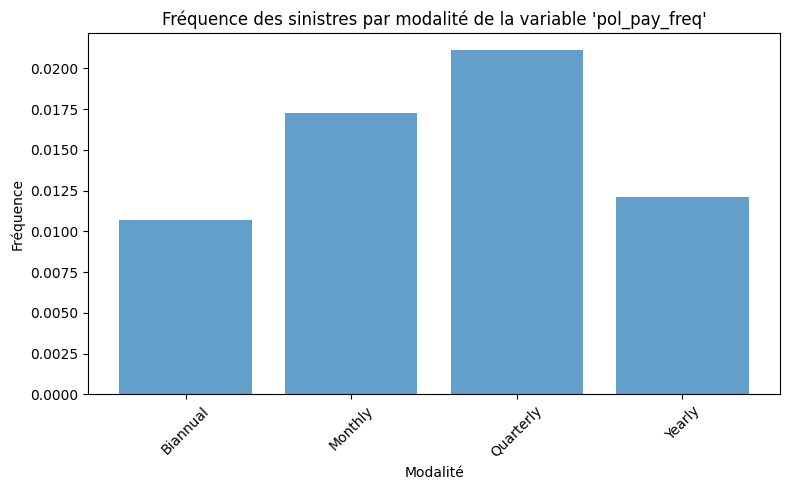

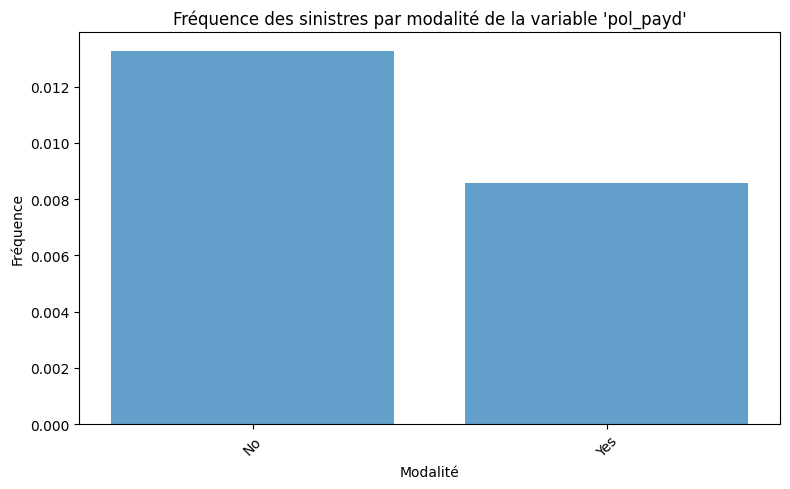

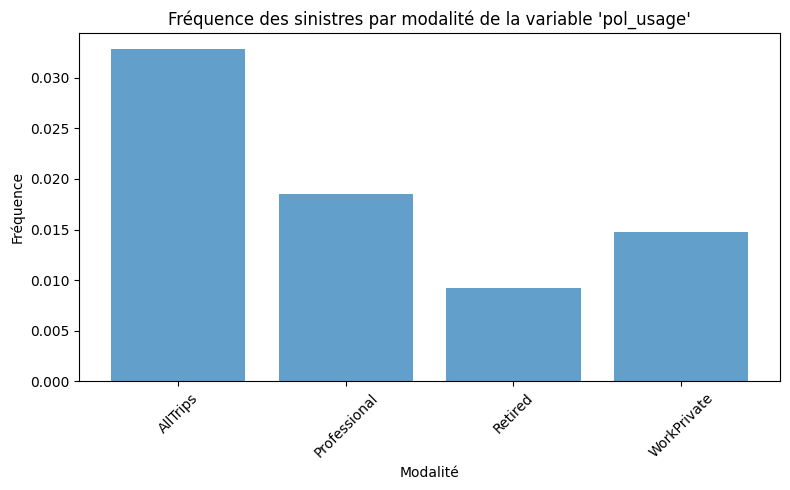

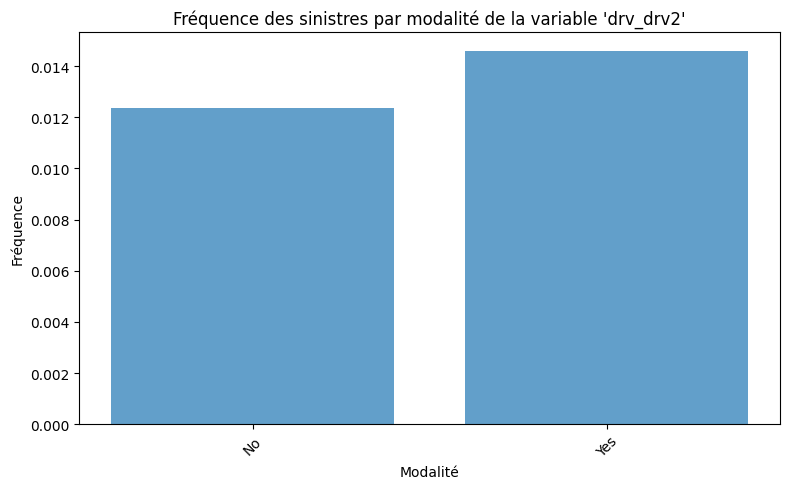

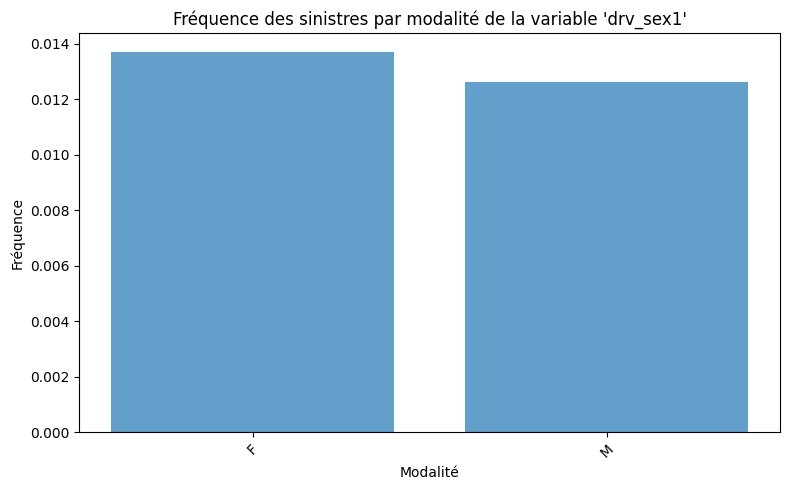

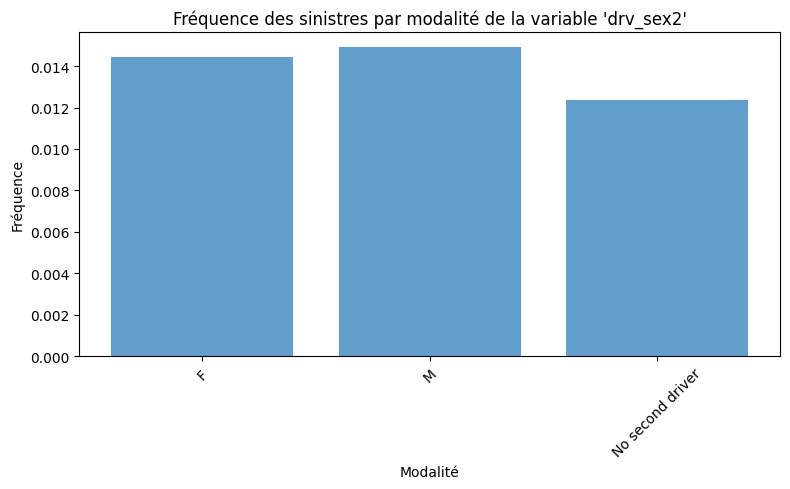

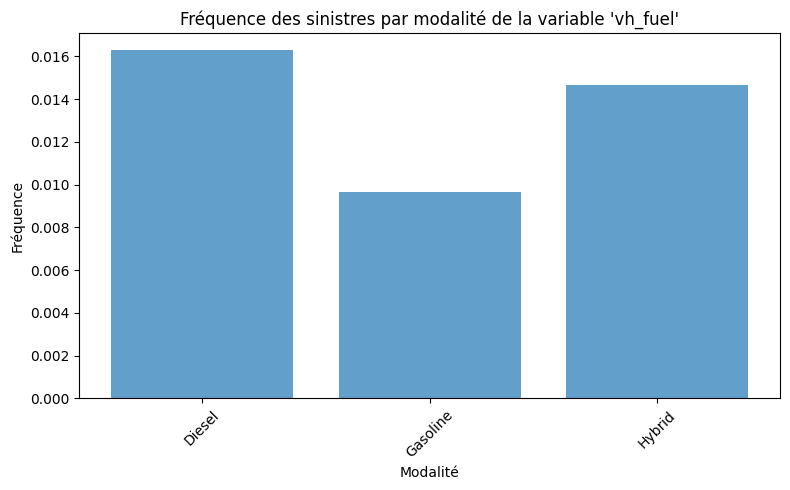

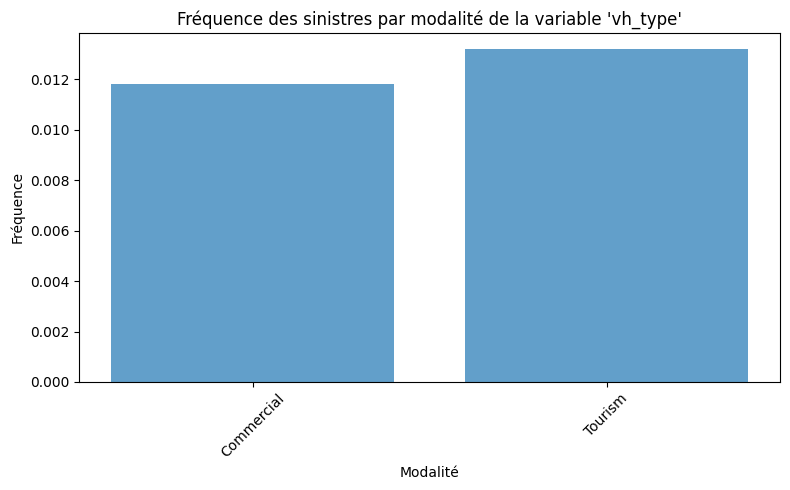

In [ ]:
# Suppose the dataframe freq_base and clients exist and contain the necessary columns

# List of columns to exclude
columns_to_exclude = ["id_client", "id_vehicle", "id_policy", "pol_insee_code","vh_make","vh_model"]

# Filtering qualitative (categorical) columns in freq_base
categorical_columns = freq_base.select_dtypes(include=['object', 'category']).columns
filtered_columns = [col for col in categorical_columns if col not in columns_to_exclude]

# Calculation of frequencies by modality for each categorical variable
resultats = {}

for var in filtered_columns:
    grouped = freq_base.groupby(var).agg(
        total_sinistres=('claim_count', 'sum'),
        total_duree=('pol_duration', 'sum')
    )
    grouped['frequence'] = grouped['total_sinistres'] / grouped['total_duree']
    resultats[var] = grouped[['frequence']]

# Creating barplots for each categorical variable
for var, resultat in resultats.items():
    plt.figure(figsize=(8, 5))
    plt.bar(resultat.index, resultat['frequence'], alpha=0.7)
    plt.title(f"Fréquence des sinistres par modalité de la variable '{var}'")
    plt.xlabel("Modalité")
    plt.ylabel("Fréquence")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


###**Analyse en Amont pour un GLM (regression logistique)**

**Dans le cas d'un GLM on va enlever les variables du passager et comme il y a une interdiction de discriminer selon le genre de la personne, on va aussi enlever ces variables.**

Pour un GLM, on va garder les variables dans notre modèle qui presentent peu de corrélation entre elles et qui sont liées à notre variable cible : la fréquence.

Creation de la variable (has_claim) qui indique si l'assuré à eu un sinistre ou non. On affecte 1 à la variable si le nombre de sinistre est supérieur ou égal à 1 et on affecte 0 sinon.

In [ ]:
# 1) Préparer la variable cible qui est binaire
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

#on exclut les variables qui n'apporte rien pour la prédiction du modèle
target = "has_claim"
columns_to_exclude = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "vh_make", "vh_model"]

df = freq_base.drop(columns=[c for c in columns_to_exclude if c in freq_base.columns]).copy()

# sécurité : on supprime ou les lignes ou la variable cible sera vide
df = df.dropna(subset=[target])


# 2) Fonctions de scoring : pour savoir si une variable est "bonne" ou non

#Pour les variables numériques : AUC = Area Under the Curve. Ca mesure la capacité à séparer les 2 classes : sinistre et non sinistre
# Si score=0.5 -> la variable est inutile, plus on s'approche de 1 et plus la variable est puissante
def univariate_auc_numeric(x: pd.Series, y: pd.Series) -> float:
    """AUC univarié pour une variable numérique.
       Si AUC<0.5, on retourne 1-AUC pour avoir un score dans [0.5, 1] toujours positif."""
    x = x.astype(float)
    # gérer NA
    if x.isna().any():
        x = x.fillna(x.median())
    # si constante -> pas d'info
    if x.nunique() <= 1:
        return np.nan
    auc = roc_auc_score(y, x)
    return max(auc, 1 - auc)

#Pour les variables catégorielles : 2 méthodes

def cramers_v(x: pd.Series, y: pd.Series) -> float:
    """Cramér's V pour association cat-cat (ici cat vs binaire)."""
    tab = pd.crosstab(x, y)
    if tab.shape[0] < 2 or tab.shape[1] < 2:
        return np.nan
    chi2, p, dof, exp = chi2_contingency(tab)
    n = tab.values.sum()
    r, k = tab.shape
    return np.sqrt((chi2 / n) / (min(r - 1, k - 1)))
# le V de Cramer sert à mesurer l'intensité de l'association entre 2 variables qualitatives,
#plus il est proche de 1 et plus la catégorie influence le risque

def chi2_pvalue(x: pd.Series, y: pd.Series) -> float:
    tab = pd.crosstab(x, y)
    if tab.shape[0] < 2 or tab.shape[1] < 2:
        return np.nan
    chi2, p, dof, exp = chi2_contingency(tab)
    return p
#on cherche généralement une P_Value < 0.05

# 3) Séparer numériques / catégorielles (avant dummies) les données en 2 listes

y = df[target].astype(int)
feature_cols = [c for c in df.columns if c != target]
# les 2 listes :
cat_cols = df[feature_cols].select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = [c for c in feature_cols if c not in cat_cols]


# 4) Scoring univarié pour chaque colonne

rows = []

# numériques : AUC
for col in num_cols:
    score_auc = univariate_auc_numeric(df[col], y)
    rows.append({
        "feature": col,
        "type": "numeric",
        "score_auc": score_auc,
        "cramers_v": np.nan,
        "p_value_chi2": np.nan,
        "n_unique": df[col].nunique(dropna=True)
    })

# catégorielles : Cramér's V + chi2
for col in cat_cols:
    # optionnel : regrouper les modalités rares en "Other" pour éviter du bruit
    s = df[col].astype("object").fillna("Missing")
    value_counts = s.value_counts(dropna=False)
    rare = value_counts[value_counts < 30].index  # seuil à ajuster
    s = s.replace(rare, "Other")

    v = cramers_v(s, y)
    p = chi2_pvalue(s, y)

    rows.append({
        "feature": col,
        "type": "categorical",
        "score_auc": np.nan,
        "cramers_v": v,
        "p_value_chi2": p,
        "n_unique": s.nunique(dropna=True)
    })

#on stocke tout dans un même data frame
scores = pd.DataFrame(rows)

# 5) Classement + sélection des 20 "meilleures variables" : 10 catégorielles et 10 numériques

# Numériques : trier par AUC décroissant
scores_num = scores[scores["type"] == "numeric"].sort_values("score_auc", ascending=False)

# Catégorielles : trier par Cramér's V décroissant (et p-value croissante si tu veux)
scores_cat = scores[scores["type"] == "categorical"].sort_values(
    ["cramers_v", "p_value_chi2"], ascending=[False, True]
)

# Choix simple : top K dans chaque famille
K_num = 10
K_cat = 10

best_num = scores_num.head(K_num)
best_cat = scores_cat.head(K_cat)

selected_features = best_num["feature"].tolist() + best_cat["feature"].tolist()

print(" Top variables NUMERIQUES (par AUC univarié)")
display(best_num)

print(" Top variables CATEGORIELLES (par Cramér's V) ")
display(best_cat)

print(" Variables sélectionnées pour les modèles GLM")
print(selected_features)


 Top variables NUMERIQUES (par AUC univarié)


,feature,type,score_auc,cramers_v,p_value_chi2,n_unique
9,vh_sale_begin,numeric,0.608205,NaN,NaN,63
6,vh_age,numeric,0.606892,NaN,NaN,63
10,vh_sale_end,numeric,0.605806,NaN,NaN,55
12,vh_value,numeric,0.572710,NaN,NaN,4732
8,vh_din,numeric,0.569953,NaN,NaN,207
11,vh_speed,numeric,0.562588,NaN,NaN,176
13,vh_weight,numeric,0.560075,NaN,NaN,974
7,vh_cyl,numeric,0.532842,NaN,NaN,530
4,drv_age_lic1,numeric,0.523388,NaN,NaN,78
2,drv_age1,numeric,0.523308,NaN,NaN,83


 Top variables CATEGORIELLES (par Cramér's V) 


,feature,type,score_auc,cramers_v,p_value_chi2,n_unique
14,pol_coverage,categorical,NaN,0.115188,3.316656e-142,4
21,vh_fuel,categorical,NaN,0.066991,5.054375e-49,3
17,pol_usage,categorical,NaN,0.035030,3.939509e-13,4
15,pol_pay_freq,categorical,NaN,0.025359,5.568488e-07,4
22,vh_type,categorical,NaN,0.025281,1.821438e-08,2
16,pol_payd,categorical,NaN,0.020131,7.407263e-06,2
20,drv_sex2,categorical,NaN,0.019060,1.231826e-04,3
18,drv_drv2,categorical,NaN,0.018732,3.043655e-05,2
19,drv_sex1,categorical,NaN,0.014475,1.271406e-03,2


 Variables sélectionnées pour les modèles GLM
['vh_sale_begin', 'vh_age', 'vh_sale_end', 'vh_value', 'vh_din', 'vh_speed', 'vh_weight', 'vh_cyl', 'drv_age_lic1', 'drv_age1', 'pol_coverage', 'vh_fuel', 'pol_usage', 'pol_pay_freq', 'vh_type', 'pol_payd', 'drv_sex2', 'drv_drv2', 'drv_sex1']


['vh_sale_begin', 'vh_age', 'vh_sale_end', 'vh_value', 'vh_din', 'vh_speed', 'vh_weight', 'vh_cyl', 'drv_age_lic1', 'drv_age1', 'pol_coverage', 'vh_fuel', 'pol_usage', 'pol_pay_freq', 'vh_type', 'pol_payd'] sont les variables selectionées pour les modèles GLM

In [ ]:
#Analyse de la colinéarité

vars_sel = selected_features
print(vars_sel)

#vars_sel = [
#    'vh_sale_begin', 'vh_age', 'vh_sale_end', 'vh_value', 'vh_din', 'vh_speed',
#    'vh_weight', 'vh_cyl', 'drv_age_lic1', 'drv_age1',
#    'pol_coverage', 'vh_fuel', 'pol_usage', 'pol_pay_freq', 'vh_type', 'pol_payd'
#]

df = freq_base[vars_sel].copy()

# Séparer numériques / catégorielles (selon dtypes) les variables car selon le groupe elles ne veulent pas dire la même chose
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
num_cols = [c for c in df.columns if c not in cat_cols]

print("Numériques :", num_cols)
print("Catégorielles :", cat_cols)


# 1) Corrélation Pearson (num-num)

corr_num = df[num_cols].corr() if len(num_cols) > 1 else None
print("\n--- Corrélation Pearson (num-num) ---")
print(corr_num)


# 2) Cramér's V (cat-cat)

def cramers_v(x, y):
    tab = pd.crosstab(x, y)
    if tab.shape[0] < 2 or tab.shape[1] < 2:
        return np.nan
    chi2, p, dof, exp = chi2_contingency(tab)
    n = tab.values.sum()
    r, k = tab.shape
    return np.sqrt((chi2 / n) / (min(r - 1, k - 1)))

corr_cat = None
if len(cat_cols) >= 2:
    corr_cat = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for a in cat_cols:
        for b in cat_cols:
            if a == b:
                corr_cat.loc[a, b] = 1.0
            else:
                xa = df[a].astype("object").fillna("Missing")
                xb = df[b].astype("object").fillna("Missing")
                corr_cat.loc[a, b] = cramers_v(xa, xb)

print("\n--- Association Cramér's V (cat-cat) ---")
print(corr_cat)


# 3) Correlation ratio eta (num-cat) : numérique vs catégorielle

def correlation_ratio(categories, measurements):
    """
    eta = sqrt( between_var / total_var )
    """
    s = pd.DataFrame({"cat": categories, "x": measurements}).dropna()
    if s["cat"].nunique() < 2:
        return np.nan
    overall_mean = s["x"].mean()
    groups = s.groupby("cat")["x"]
    n = groups.size()
    means = groups.mean()
    between = (n * (means - overall_mean) ** 2).sum()
    total = ((s["x"] - overall_mean) ** 2).sum()
    if total == 0:
        return np.nan
    return np.sqrt(between / total)

corr_num_cat = None
if len(num_cols) >= 1 and len(cat_cols) >= 1:
    corr_num_cat = pd.DataFrame(index=num_cols, columns=cat_cols, dtype=float)
    for ncol in num_cols:
        for ccol in cat_cols:
            corr_num_cat.loc[ncol, ccol] = correlation_ratio(df[ccol], df[ncol])

print("\n--- Eta (num-cat) : force de lien entre une numérique et une catégorielle ---")
print(corr_num_cat)


['vh_sale_begin', 'vh_age', 'vh_sale_end', 'vh_value', 'vh_din', 'vh_speed', 'vh_weight', 'vh_cyl', 'drv_age_lic1', 'drv_age1', 'pol_coverage', 'vh_fuel', 'pol_usage', 'pol_pay_freq', 'vh_type', 'pol_payd', 'drv_sex2', 'drv_drv2', 'drv_sex1']
Numériques : ['vh_sale_begin', 'vh_age', 'vh_sale_end', 'vh_value', 'vh_din', 'vh_speed', 'vh_weight', 'vh_cyl', 'drv_age_lic1', 'drv_age1']
Catégorielles : ['pol_coverage', 'vh_fuel', 'pol_usage', 'pol_pay_freq', 'vh_type', 'pol_payd', 'drv_sex2', 'drv_drv2', 'drv_sex1']

--- Corrélation Pearson (num-num) ---
               vh_sale_begin    vh_age  vh_sale_end  vh_value    vh_din  \
vh_sale_begin       1.000000  0.959016     0.948079 -0.327156 -0.355832   
vh_age              0.959016  1.000000     0.948885 -0.296683 -0.316280   
vh_sale_end         0.948079  0.948885     1.000000 -0.329925 -0.336777   
vh_value           -0.327156 -0.296683    -0.329925  1.000000  0.887027   
vh_din             -0.355832 -0.316280    -0.336777  0.887027  1.00000

Si on fait un GLM **on va enlever : vh_sale_begin, vh_sale_end, drv_age_lic1, vh_din, vh_speed, vh_weight, vh_cyl**

#**CALIBRATION DE PROBABILITES EN CLASSIFICATION SUPERVISEE**

## **0. Rappel**

L’objectif est de prédire, à partir des caractéristiques de l’assuré et du contrat, s’il y aura un sinistre ou non sur la période étudiée. Il s’agit donc d’un problème de classification binaire, avec deux classes : 1 = sinistre et 0 = pas de sinistre.

Nous cherchons à estimer une probabilité d’appartenir à la classe “sinistre” P(Y=1 ∣ X)) pour laquelle X représente les variables explicatives et Y la variable cible (sinistre). L'article démontre que certains modèles sont meilleurs que d'autres pour estimer cette probabilité exacte et non pas juste savoir si le client est risqué ou non.

Pour cela, nous utilisons un modèle de machine learning supervisé : le modèle est entraîné sur un jeu de données où la variable
Y est connue (données étiquetées), afin d’apprendre une relation entre X et Y. Une fois entraîné, il pourra prédire, pour un nouvel assuré/contrat, la classe la plus probable (sinistre ou non) ainsi que la probabilité associée.

Nous pouvons modéliser l’occurrence/survenance d’un sinistre via un modèle de classification comme un SVM (méthode marge maximale). En actuariat, la fréquence est souvent modélisée directement comme un nombre de sinistres via un GLM Poisson (avec exposition/offset). Le choix dépend donc de la cible : occurrence binaire vs nombre de sinistres.”

Le SVM cherche à séparer les données avec la plus grande marge possible.

La plupart des modèles ne sortent pas directement une probabilité fiable, mais un score (une distance à une frontière pour le SVM, ou un vote moyen pour les arbres). Même quand ils affichent une valeur entre 0 et 1, ces probabilités sont souvent déformées : le modèle peut être trop sûr de lui (sur-confiant) ou trop hésitant (sous-confiant).

L'**AUC** mesure uniquement si le modèle sait classer les individus (mettre les dossiers risqués au-dessus des autres). Cependant, en assurance, nous avons besoin de la valeur exacte du risque pour calculer la prime. Un modèle peut avoir un excellent AUC mais des probabilités totalement fausses (ex: prédire 20% de risque alors que le risque réel est de 5%). On cherche donc des probabilités calibrées, c'est-à-dire qui correspondent à la fréquence réelle observée sur le terrain.


Ces méthodes interviennent après l'entraînement du modèle initial pour "redresser" ses prédictions :

**Platt Scaling**: Consiste à passer le score dans une régression logistique. C'est la méthode de référence pour corriger la distorsion en forme de "S" typique des SVM et du Boosting.

**Isotonic Regression**: Une méthode non-paramétrique plus souple (forme en escalier). Elle est très efficace pour des modèles aux erreurs plus complexes comme Naive Bayes, les Arbres de décision ou le Boosting, mais elle nécessite beaucoup plus de données de validation pour éviter le sur-apprentissage.

Platt scaling et isonic regression sont des méthodes de calibration a posteriori (probabilité a posteriori).

Ces modèles de calibration ne sont pas utiles pour Logit / GLM binomial et  bagging / random forests


**PLAN**

1. Tester plusieurs modèles de prédiction (SVM, Naive Bayes, Probabilistes : bagging, boosting)



2. Discrimination (AUC/ROC) : est-ce que le modèle classe bien les risques ?
Calibration (log-loss, Brier score, courbe de calibration) : est-ce que les probabilités sont justes ?
(L’article insiste sur le fait que les critères ROC/AUC ne garantissent pas de bonnes probabilités.)



3. Ne calibrer que les modèles qui en ont besoin :
Les méthodes tels que : SVM, boosting trees ont souvent une distorsion sigmoïde donc la calibration est utile.
Naive Bayes a souvent le biais inverse (probas trop extrêmes) donc isotonic est souvent meilleur.

Réseaux de neurones, bagging, et logistic regression sont souvent déjà bien calibrés. On va tenter de montrer comme exemple que la regression logistique est bien calibré.

Comme l'article le dit, le Platt Scaling devrait mieux marcher sur nos SVM si on n'a pas beaucoup de données de calibration, mais l'Isotonic devrait être plus précise si notre échantillon est grand.





## **1. Tester plusieurs modèles de prédiction (SVM, Naive Bayes, Probabilistes : bagging, boosting)**

###Rappel : Modelisation Probabiliste

1) Réseaux de neurones

Les réseaux de neurones sont des modèles de machine learning capables d’apprendre des relations complexes (souvent non linéaires) entre les variables explicatives X et la cible Y.
En classification, ils peuvent fournir une probabilité d’appartenir à une classe (sigmoïde pour une classification binaire, softmax pour une classification multi-classes).
En régression, ils prédisent directement une valeur continue.

2) Arbres de décision

Un arbre seul peut être instable (il change beaucoup selon l’échantillon d’apprentissage), c’est pourquoi on utilise souvent des méthodes d’ensemble qui combinent plusieurs arbres.

2.1) Bagging

Le bagging consiste à entraîner plusieurs modèles indépendants (souvent des arbres) sur des échantillons bootstrap (tirages avec remise) du jeu de données, puis à agréger leurs prédictions.
L’agrégation se fait en général par moyenne des probabilités (classification) ou moyenne des valeurs prédites (régression).

Exemple : Random Forest (bagging d’arbres, avec en plus une sélection aléatoire de variables à chaque split).

- Bagging Classifier : ensemble d’arbres pour réaliser une classification (moyenne des probabilités).
- Bagging Regressor : ensemble d’arbres pour prédire une variable continue (moyenne des prédictions).

2.2) Boosting

Le boosting consiste à entraîner des modèles de manière séquentielle : chaque nouveau modèle est ajouté pour corriger les erreurs des modèles précédents.
On combine ensuite tous les modèles (souvent des arbres peu profonds) pour obtenir un modèle final très performant.

Exemples : AdaBoost, Gradient Boosting, XGBoost, LightGBM.

- Boosting Classifier : boosting appliqué à une tâche de classification.
- Boosting Regressor : boosting appliqué à une tâche de régression.


Par la suite on va se concentrer sur des modèles Classifier pour prédire la probabilité d'etre dans une classe.
On va comparer les modèles : Boosting (XGBoost), Bagging (randomforest), SVM et Naive Bayes.

On va calculer pour chaque modèle :
- les prédictions de classes pour l'AUC
- les probabilités prédites pour la calibration

### **1.1 Modèle Probabiliste Bagging**

#### RandomForest Classifer (Bagging)

D'après l'article, les bagging trees donnent déjà des probabilités bien calibrées meilleurs que les autres car on moyenne beaucoup d’arbres ce qui réduit la variance Cette méthode est mieux calibrée que le Boosting dès le départ. Cependant, il peut être parfois trop prudent. Quand elles sont mal calibrées, ils observent souvent une forme sigmoïde sur le reliability diagram donc des probas repoussées vers le milieu or l’article montre aussi que calibrer un modèle déjà bien calibré peut ne rien apporter voire dégrader. Donc il faut tester et comparer.

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34591
           1       1.00      1.00      1.00      5057

    accuracy                           1.00     39648
   macro avg       1.00      1.00      1.00     39648
weighted avg       1.00      1.00      1.00     39648

Training Accuracy: 0.9999
Training ROC-AUC Score: 1.0000
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      8625
           1       0.11      0.00      0.00      1287

    accuracy                           0.87      9912
   macro avg       0.49      0.50      0.47      9912
weighted avg       0.77      0.87      0.81      9912

Test Accuracy: 0.8679
Test ROC-AUC Score: 0.5955

Comparison between Training and Test:
Accuracy Difference: 0.1320
ROC-AUC Difference: 0.4045
Top 10 Features by Importance:
          Feature  Importance
2        dr

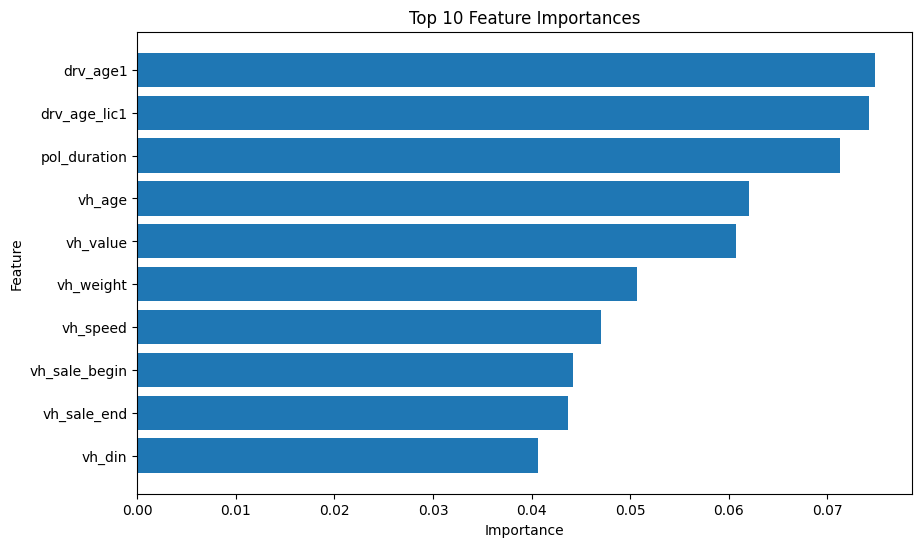

In [ ]:
# Add a binary column to detect if 'claim_count > 0'
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# List of columns to exclude
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "has_claim"]


# Selection of explanatory variables
X = freq_base.drop(columns=excluded_columns)
y = freq_base["has_claim"]

# Encoding of categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier Model for Classification
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_clf.fit(X_train, y_train)

# Predictions for classification
y_class_proba = rf_clf.predict_proba(X_test)[:, 1]  # Probability of having a claim
y_class_pred = rf_clf.predict(X_test)

# Coaching Game Assessment
y_train_proba = rf_clf.predict_proba(X_train)[:, 1]  # Train Probability
y_train_pred = rf_clf.predict(X_train)

print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training ROC-AUC Score: {train_roc_auc:.4f}")

# Evaluation on the test set
print("Classification Report (Test Data):")
print(classification_report(y_test, y_class_pred))

test_accuracy = accuracy_score(y_test, y_class_pred)
test_roc_auc = roc_auc_score(y_test, y_class_proba)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC-AUC Score: {test_roc_auc:.4f}")

# Comparison between training and testing
print("\nComparison between Training and Test:")
print(f"Accuracy Difference: {train_accuracy - test_accuracy:.4f}")
print(f"ROC-AUC Difference: {train_roc_auc - test_roc_auc:.4f}")

# Extracting the Importance of Features
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Showing the top 10 features
print("Top 10 Features by Importance:")
print(importances.head(10))

# Visualization of the importance of features
plt.figure(figsize=(10, 6))
plt.barh(importances["Feature"][:10], importances["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


<Figure size 600x500 with 0 Axes>

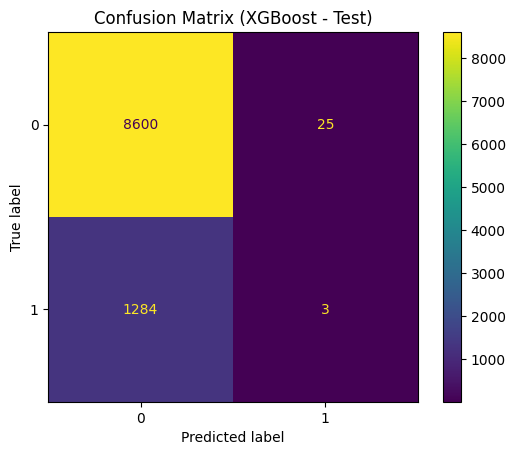

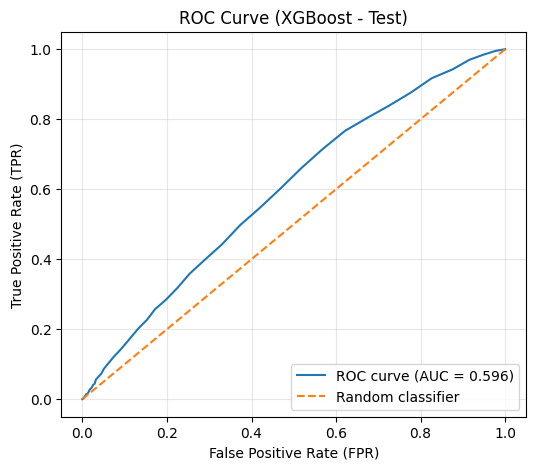

In [ ]:
# 1) Confusion matrix
cm = confusion_matrix(y_test, y_class_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title("Confusion Matrix (XGBoost - Test)")
plt.show()

# 2) ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_class_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (XGBoost - Test)")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


classe 0 : recall ≈ 1.00 (il récupère quasi tous les non-sinistres)

classe 1 : recall = 0.00 (il ne détecte presque aucun sinistre)
Le test a :

classe 0 = 8600

classe 1 = 1284

Le modèle a détécté seulement 3 sinistres sur 1284 : quasiment incapable de détecter.
Et sur 8600 assurés, il ne s'est trompé que sur 25 personnes : il détectent presque tous les non sinistres.

Donc la classe 1 représente ~13.4%.

Si on prédis toujours 0, tu as déjà une accuracy ≈ 86.6%

Overfitting

Un AUC de 0.596 est très faible (on est proche de la valeur 0.50, qui constitue le hasard pur).

Le modèle n'arrive presque pas à classer un client sinistré au-dessus d'un client sain  --> le résultat observé n'est pas concluant.

un assuré qui a eu un sinistre (classe 1),

un assuré qui n’a pas eu de sinistre (classe 0),

L’AUC = la probabilité que le modèle donne un score/probabilité plus élevé à l’assuré sinistré qu’au non-sinistré.

Sur 1284 sinistres en test, le modèle n’en retrouve que 3.
Donc Accuracy = 0.85 est toujours trompeuse car désequilibre.

Et grace au graphique, on voit que le modèle est trop confiant : au dessus de la courbe random classifier.

**Best Hyperparametres**

Best parameters found: {'class_weight': 'balanced_subsample', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 90}
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.92      0.45      0.60     34573
           1       0.17      0.75      0.27      5075

    accuracy                           0.49     39648
   macro avg       0.55      0.60      0.44     39648
weighted avg       0.83      0.49      0.56     39648

Training Accuracy: 0.4853
Training ROC-AUC Score: 0.6487
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.45      0.60      8643
           1       0.16      0.71      0.26      1269

    accuracy                           0.48      9912
   macro avg       0.54      0.58      0.43      9912
weighted avg       0.82      0.48      0.56      9912

Test Accuracy: 0.4843
Test ROC-AUC Score: 0.61

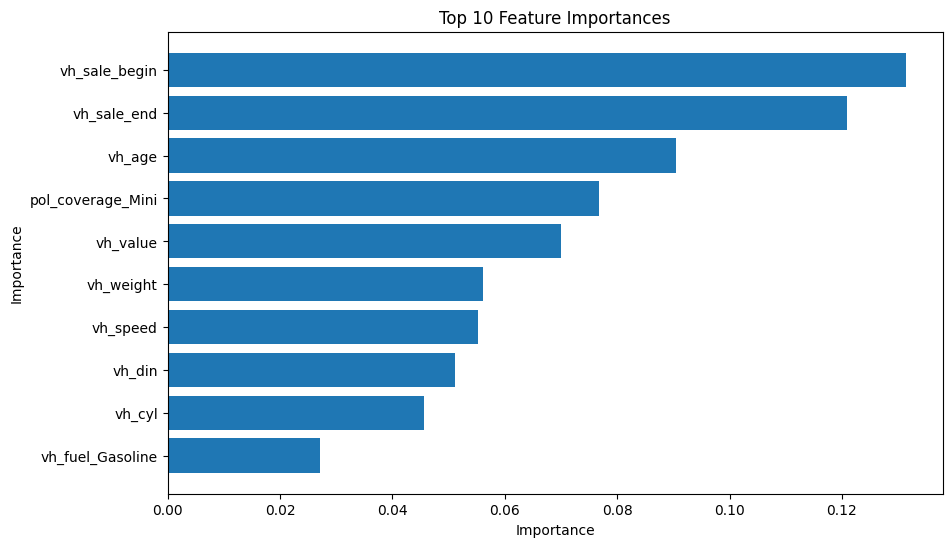

In [ ]:
# Add a binary column to detect if `claim_count > 0`
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# List of columns to exclude
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "has_claim"]

# Selecting explanatory variables
X = freq_base.drop(columns=excluded_columns)
y = freq_base["has_claim"]

# Encoding of categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test) + stratify recommandé
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    # Gestion du déséquilibre via pondération (au lieu de SMOTE)
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# RandomizedSearchCV configuration
rf_clf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Run the search (sans SMOTE)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best parameters found:", best_params)

# Train a model with the best parameters
best_rf_clf = random_search.best_estimator_

# Evaluation on training set
y_train_proba = best_rf_clf.predict_proba(X_train)[:, 1]
y_train_pred = best_rf_clf.predict(X_train)

print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred, zero_division=0))

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training ROC-AUC Score: {train_roc_auc:.4f}")

# Predictions on the test set
y_class_proba = best_rf_clf.predict_proba(X_test)[:, 1]
y_class_pred = best_rf_clf.predict(X_test)

# Evaluation on the test set
print("Classification Report (Test Data):")
print(classification_report(y_test, y_class_pred, zero_division=0))

test_accuracy = accuracy_score(y_test, y_class_pred)
test_roc_auc = roc_auc_score(y_test, y_class_proba)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC-AUC Score: {test_roc_auc:.4f}")

# Comparison between training and test results
print("\nComparison between Training and Test:")
print(f"Accuracy Difference: {train_accuracy - test_accuracy:.4f}")
print(f"ROC-AUC Difference: {train_roc_auc - test_roc_auc:.4f}")

# Extract feature importances
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_rf_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top 10 features
print("Top 10 Features by Importance:")
print(importances.head(10))

# Visualization of feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances["Feature"][:10], importances["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Importance")
plt.show()


Amélioration avec les meilleurs hyperaramètres, mais toujours problème de désequilibre de classe. **Bon recall mais précision insatisfaisante.**


**Matrice de confusion et courbe ROC**

<Figure size 600x500 with 0 Axes>

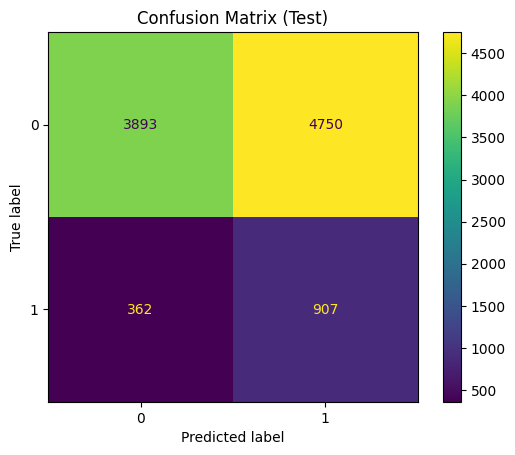

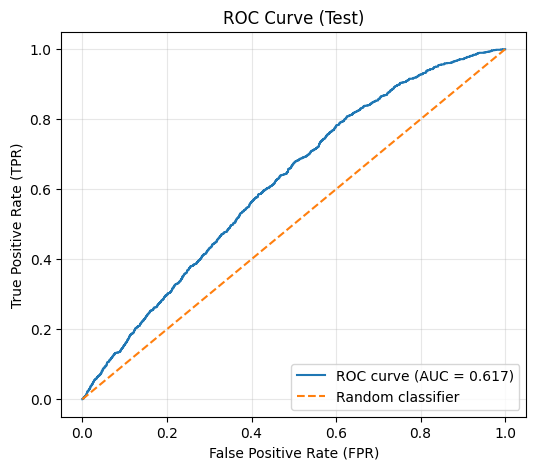

In [ ]:
# 1) Confusion matrix
cm = confusion_matrix(y_test, y_class_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title("Confusion Matrix (Test)")
plt.show()

# 2) ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_class_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (Test)")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()



AUC à 0.61 se rapproche du hasard et ca veut dire que si on prends au hasard un assuré sinistré (1) et un non-sinistré (0), le modèle mettra le sinistré au-dessus dans 61% des cas. La courbe est proche de la diagonale orange donc presque aléatoire la classification

-> mais amélioration comparé à la précédente.

D'après la matrice de confusion, le modèle ose maintenant prédire des sinisters : 907 (violet clair) sont correctement détectés. Le modèle fait maintenant 4750 erreurs (jaune).
Il y a 362 (violet foncé) personnes qui ont eu un sinistres mais que le modèle détecté comme non-sinistrés. Et il y a eu 3893 vrais personnes non sinistrés que le modèle détecté bien comme non sinistrés.

**Méthode pour équilibrer :**



**Sur-echantillonage/sous echantillonage** : modifient la proportion de 1 et de 0 dans le train (sous-échantillonnage, en
supprimant un certain nombre d'exemples de la classe
majoritaire, ou à un sur-échantillonnage, en répliquant ou en ajoutant des points de la catégorie minoritaire).

Par exemple modèle de sur-echantillonage : **SMOTE** crée de nouveaux exemples artificiels de la classe minoritaire (sinistre=1) dans le train.

Ça aide le modèle à “voir” plus de sinistres et à moins tout prédire en 0. Mais change les probabilités donc on ne l'ajoute pas.

Le modèle entraîné sur ces données va apprendre des scores/probas qui correspondent à cette proportion artificielle, pas à la proportion réelle. **Or Platt scaling / isotonic doivent être entraînés sur un jeu de calibration qui a la distribution réelle (non resamplée).**

On va essayer d'améliorer le modèle : on construit un jeu d’entraînement équilibré en gardant tous les sinistres (classe 1) et en tirant au hasard le même nombre de non-sinistres (classe 0). Ainsi, le modèle est entraîné sur un train où les deux classes ont le même poids, ce qui l’incite à mieux apprendre les caractéristiques associées aux sinistres au lieu de prédire “0” presque partout.

**Je crois que cela modifie aussi proba=>pas ce qu'on veut. OU ça va améliorer le AUC donc classification mais pas les probabilités.**

=== Résultats sur 30 splits (test_size=0.2) ===
Accuracy     mean=0.537  std=0.006  min=0.524  max=0.552
ROC-AUC      mean=0.600  std=0.007  min=0.587  max=0.613
Precision(1) mean=0.160  std=0.003  min=0.154  max=0.167
Recall(1)    mean=0.613  std=0.012  min=0.593  max=0.639


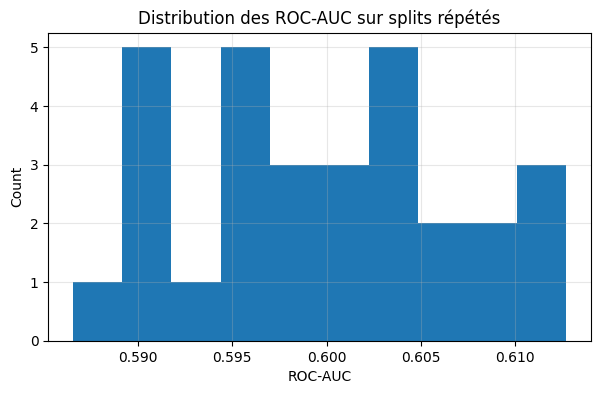

In [ ]:
# 1) Target binaire
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# 2) Colonnes à exclure
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "has_claim"]

# 3) X / y
X = freq_base.drop(columns=excluded_columns)
y = freq_base["has_claim"]

# 4) Encodage catégories
X = pd.get_dummies(X, drop_first=True)


# Repeated split + undersampling train

R = 30 # on fait 30 split à chaque itération, le code  donne un nouvel ensemble d’indices train/test
test_size = 0.2

sss = StratifiedShuffleSplit(n_splits=R, test_size=test_size, random_state=42) #on garde tous les 1 et on tire parmis tous les  0 autant de  0 que de 1 aleatoirement
rus = RandomUnderSampler(random_state=42) #le test reste réel

acc_list, auc_list, prec1_list, rec1_list = [], [], [], []

for i, (train_idx, test_idx) in enumerate(sss.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 5) Rééquilibrage UNIQUEMENT du train (autant de 0 que de 1)
    X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

    # 6) Modèle
    rf_clf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
    rf_clf.fit(X_train_bal, y_train_bal)

    # 7) Probas + prédictions sur le test (non modifié)
    proba_test = rf_clf.predict_proba(X_test)[:, 1]
    pred_test = (proba_test >= 0.5).astype(int)

    # 8) Métriques, calculer les métriques à chaque split (30 fois)
    acc_list.append(accuracy_score(y_test, pred_test))
    auc_list.append(roc_auc_score(y_test, proba_test))
    prec1_list.append(precision_score(y_test, pred_test, zero_division=0))
    rec1_list.append(recall_score(y_test, pred_test, zero_division=0))


# Résumé (moyenne de chaque split)

def summarize(name, arr):
    arr = np.array(arr)
    print(f"{name:<12} mean={arr.mean():.3f}  std={arr.std():.3f}  min={arr.min():.3f}  max={arr.max():.3f}")

print(f"=== Résultats sur {R} splits (test_size={test_size}) ===")
summarize("Accuracy", acc_list)
summarize("ROC-AUC", auc_list)
summarize("Precision(1)", prec1_list)
summarize("Recall(1)", rec1_list)

# histogramme des AUC pour voir la stabilité
plt.figure(figsize=(7,4))
plt.hist(auc_list, bins=10)
plt.title("Distribution des ROC-AUC sur splits répétés")
plt.xlabel("ROC-AUC")
plt.ylabel("Count")
plt.grid(True, alpha=0.3)
plt.show()


**Bon recall, mauvaise précision et AUC moyen** pas forcément meilleur que le modèle avec l'optimisation des paramètres.

Le ROC-AUC reste autour de 0,6, ce qui est supérieur à 0,5 (modèle au hasard) : le modèle parvient donc à trier légèrement mieux que le hasard. L’accuracy baisse, ce qui est normal car l’équilibrage pousse le modèle à prédire davantage de 1 (sinistres) ; dans un contexte de classes déséquilibrées, l’accuracy n’est d’ailleurs pas la métrique la plus pertinente. Le recall de la classe 1 est meilleur, à 0,613 : cela signifie que sur 100 vrais sinistres, le modèle en détecte environ 61. En revanche, la precision de la classe 1 est faible, à 0,160 : quand le modèle prédit “sinistre”, il a raison seulement dans 16% des cas, ce qui indique beaucoup de faux positifs.

#### Rappel : L’AUC ne dit pas si “0.60” correspond vraiment à 60% de sinistre. C’est la calibration (Brier, log-loss, courbe de calibration). L’AUC (ROC-AUC) est la probabilité que le modèle attribue un score plus élevé à un assuré qui aura un sinistre qu’à un assuré qui n’en aura pas (donc ça mesure la qualité du tri des risques).
####Un AUC = 0,6 veut dire que le modèle trie un peu mieux que le hasard : si on prends au hasard un sinistré et un non-sinistré, il mettra le sinistré au-dessus dans 60% des cas (contre 50% pour du hasard).

####AUC compare les scores/probas du modèle avec les labels réels (0/1) mais uniquement pour vérifier le classement. Cela verifie si est-ce que les sinistres ont en général un score plus élevé que les non-sinistres ? L’AUC vérifie surtout la répartition / l’ordre.

####Pour verifier l'exactitude des probabilités il faut faire des tests de calibration : courbe de calibration (reliability diagram) ou Brier score.

####Test du ROC : La courbe ROC trace, pour tous les seuils possibles, le taux de vrais positifs (TPR/recall) en fonction du taux de faux positifs (FPR) afin d’évaluer la capacité d’un modèle à distinguer sinistre vs non-sinistre. L’AUC résume cette courbe en un nombre : plus il est proche de 1, meilleur est le tri, et 0,5 correspond à un modèle au hasard. ROC/AUC vérifie si, globalement, les assurés qui ont eu un sinistre reçoivent un score/proba plus élevé que ceux qui n’en ont pas.

### **1.2 XGBoost Méthode Probabiliste de Boosting**

Les probabilités prédites sont “massées au centre”, les reliability diagrams ont une forme en S (sigmoïde). La calibration pourrait “annule” ce déplacement de masse vers le centre.

Petit set platt scaling alors que grand set on utlise en général Regression Isonic.

XGBoost gère déjà bien le déséquilibre de classes grâce au paramètre scale_pos_weight = n0 / n1, sans modifier le dataset (donc sans sur- ni sous-échantillonnage).

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      0.64      0.77     34591
           1       0.25      0.84      0.39      5057

    accuracy                           0.66     39648
   macro avg       0.61      0.74      0.58     39648
weighted avg       0.87      0.66      0.72     39648

Training Accuracy: 0.6630
Training ROC-AUC Score: 0.8251
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.59      0.71      8625
           1       0.16      0.53      0.25      1287

    accuracy                           0.58      9912
   macro avg       0.53      0.56      0.48      9912
weighted avg       0.80      0.58      0.65      9912

Test Accuracy: 0.5840
Test ROC-AUC Score: 0.5950

Comparison between Training and Test:
Accuracy Difference: 0.0790
ROC-AUC Difference: 0.2301
Top 10 Features by Importance (XGBoost):
               Feature  Importa

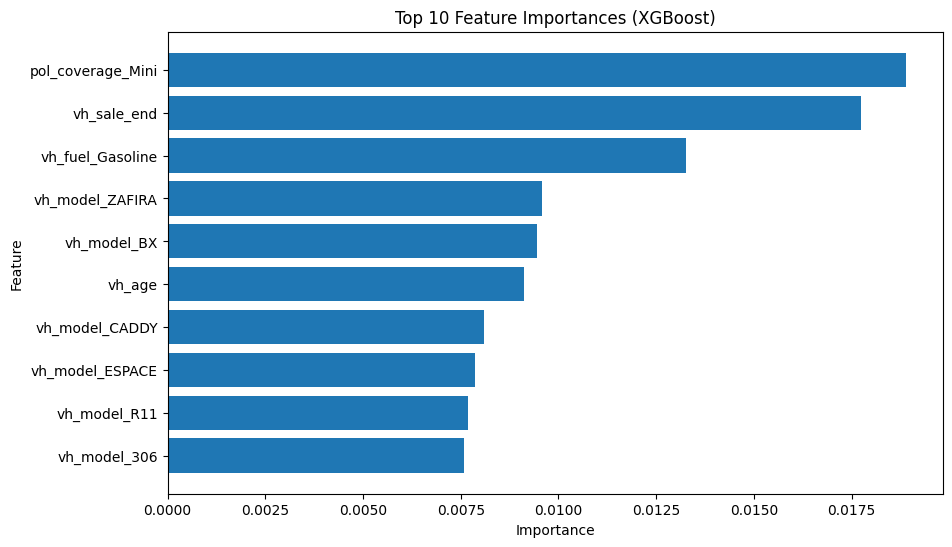

Test Brier Score: 0.2205
Test Log-Loss: 0.6237


In [ ]:
# Add a binary column to detect if `claim_count > 0`
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# List of columns to exclude
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "has_claim"]

# Selecting explanatory variables
X = freq_base.drop(columns=excluded_columns)
y = freq_base["has_claim"]

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model for classification
xgb_clf = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                         n_estimators=100,
                         random_state=42)
xgb_clf.fit(X_train, y_train)

# Evaluation on the training set
y_train_proba = xgb_clf.predict_proba(X_train)[:, 1]  # Training probabilities
y_train_pred = xgb_clf.predict(X_train)

print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

train_accuracy = accuracy_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training ROC-AUC Score: {train_roc_auc:.4f}")

# Evaluation on the test set
y_class_proba = xgb_clf.predict_proba(X_test)[:, 1]  # Probability of having a claim
y_class_pred = xgb_clf.predict(X_test)

print("Classification Report (Test Data):")
print(classification_report(y_test, y_class_pred))

test_accuracy = accuracy_score(y_test, y_class_pred)
test_roc_auc = roc_auc_score(y_test, y_class_proba)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test ROC-AUC Score: {test_roc_auc:.4f}")

# Comparison between training and test results
print("\nComparison between Training and Test:")
print(f"Accuracy Difference: {train_accuracy - test_accuracy:.4f}")
print(f"ROC-AUC Difference: {train_roc_auc - test_roc_auc:.4f}")

# Extract feature importances
importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": xgb_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Display top 10 features
print("Top 10 Features by Importance (XGBoost):")
print(importances.head(10))

# Visualization of feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances["Feature"][:10], importances["Importance"][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


##########CODE CLARA=> fait en bas

# --- AJOUT POUR LA PARTIE 2 DU PLAN ---
from sklearn.metrics import brier_score_loss, log_loss

# Calcul de la calibration sur le Test set
test_brier = brier_score_loss(y_test, y_class_proba)
test_logloss = log_loss(y_test, y_class_proba)

print(f"Test Brier Score: {test_brier:.4f}")
print(f"Test Log-Loss: {test_logloss:.4f}")


#### Optimized : Hyperparametres

Best hyperparameters found: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}
Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.93      0.48      0.64     34591
           1       0.17      0.74      0.28      5057

    accuracy                           0.52     39648
   macro avg       0.55      0.61      0.46     39648
weighted avg       0.83      0.52      0.59     39648

Training Accuracy: 0.5168
Training ROC-AUC Score: 0.6639
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.92      0.48      0.63      8625
           1       0.17      0.72      0.28      1287

    accuracy                           0.51      9912
   macro avg       0.55      0.60      0.46      9912
weighted avg       0.82      0.51      0.59      9912

Test Accuracy: 0.5142
Test ROC-AUC Score: 0.63

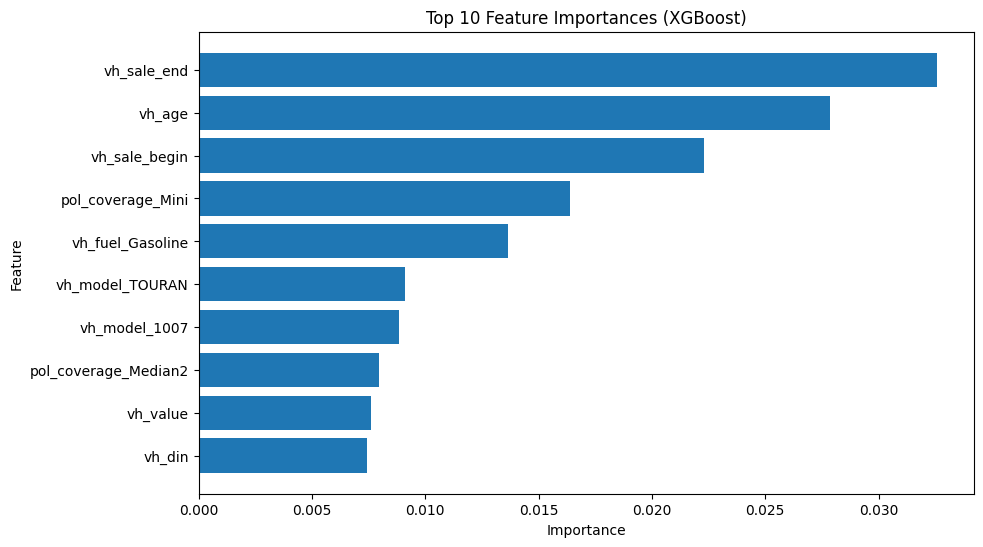

In [ ]:
# Add a binary column to detect if `claim_count > 0`
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# List of columns to exclude
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "has_claim"]

# Selecting explanatory variables
X = freq_base.drop(columns=excluded_columns)
y = freq_base["has_claim"]

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter space to explore
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2, 0.5]
}

# RandomizedSearchCV configuration
xgb_clf = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
                         random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=10,  # Number of random samples
    scoring='roc_auc',  # Evaluation based on ROC-AUC
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Run the search on the training set
try:
    random_search.fit(X_train, y_train)
except AttributeError as e:
    print("Error encountered:", e)
    print("Check the versions of Scikit-learn and XGBoost. Try with compatible versions.")

# Display the best hyperparameters if the search is complete
if hasattr(random_search, "best_params_"):
    best_params = random_search.best_params_
    print("Best hyperparameters found:", best_params)

    # Train the model with the best parameters
    best_xgb_clf = random_search.best_estimator_

    # Evaluation on the training set
    y_train_proba = best_xgb_clf.predict_proba(X_train)[:, 1]  # Training probabilities
    y_train_pred = best_xgb_clf.predict(X_train)

    print("Classification Report (Training Data):")
    print(classification_report(y_train, y_train_pred))

    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_proba)
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Training ROC-AUC Score: {train_roc_auc:.4f}")

    # Evaluation on the test set
    y_class_proba = best_xgb_clf.predict_proba(X_test)[:, 1]  # Probability of having a claim
    y_class_pred = best_xgb_clf.predict(X_test)

    print("Classification Report (Test Data):")
    print(classification_report(y_test, y_class_pred))

    test_accuracy = accuracy_score(y_test, y_class_pred)
    test_roc_auc = roc_auc_score(y_test, y_class_proba)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test ROC-AUC Score: {test_roc_auc:.4f}")

    # Comparison between training and test results
    print("\nComparison between Training and Test:")
    print(f"Accuracy Difference: {train_accuracy - test_accuracy:.4f}")
    print(f"ROC-AUC Difference: {train_roc_auc - test_roc_auc:.4f}")

    # Extract feature importances
    importances = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": best_xgb_clf.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    # Display top 10 features
    print("Top 10 Features by Importance (XGBoost):")
    print(importances.head(10))

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(importances["Feature"][:10], importances["Importance"][:10])
    plt.gca().invert_yaxis()
    plt.title("Top 10 Feature Importances (XGBoost)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

Pas vraiment d'amélioration avec l'optimisation des hyperparametres.

On a un meilleur AUC à 0.63 (moyen, prédit un peu mieux que le hasard) et on obtient un meilleur recall pour la classe 1 pour le test : 0.71 donc environ 791 sont corectement prédit (vrai positif) sur 1115 en comparaison avec le RandomForest.

**Matrice de confusion et courbe ROC**

<Figure size 600x500 with 0 Axes>

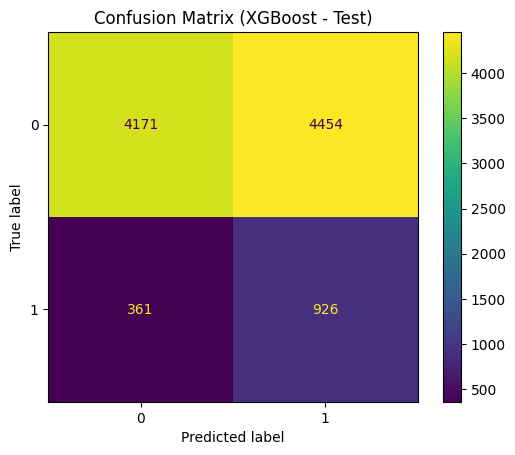

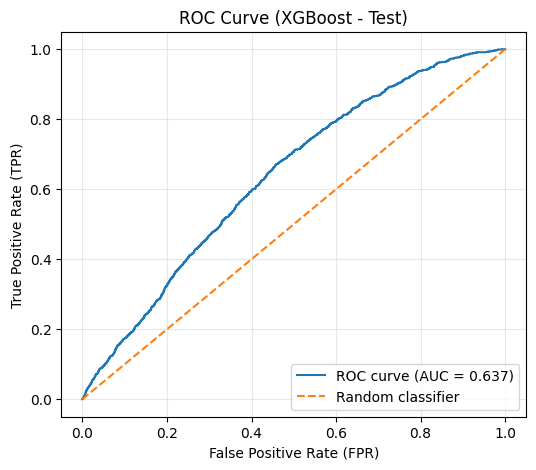

In [ ]:
# 1) Confusion matrix
cm = confusion_matrix(y_test, y_class_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title("Confusion Matrix (XGBoost - Test)")
plt.show()

# 2) ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_class_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve (XGBoost - Test)")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


En regardant la diagonale (vrai positif et vrai negatif) on obtient de meilleurs resultats que le RandomForest.

### **1.3 Méthode satistique : GLM Régression Logistique**

La logistic regression fait partie des méthodes qui prédissent déjà des probabilités bien calibrées (avec les réseaux de neurones et les bagged trees). Du coup, ajouter une calibration a posteriori (Platt ou isotonic) apporte peu ou pas d’amélioration, et peut même dégrader quand le jeu de calibration est petit.
Donc à verifier.


Modèle statistique plus souvent utilisé dans les modèles de tarification en actuariat.

Les choix des variables est important (décorrelées entres elles mais corrélées à la cible voir creation et analyse de la base plus haut).

In [ ]:
# 1) Target binaire
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# 2) Colonnes à exclure
columns_to_exclude = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "vh_model", "vh_make"]

# 3) X / y
X = freq_base.drop(columns=columns_to_exclude + ["claim_count", "has_claim"])
y = freq_base["has_claim"]

# 4) Split (stratify conseillé)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5) Formule (logit)
#  variables  catégorielles => C(var), choix des variables en fonction de l'analyse vu plus haut
formula = (
    "has_claim ~ pol_bonus + C(pol_coverage) + C(pol_pay_freq) + C(pol_payd) + C(pol_usage) + "
    "drv_age1 + "
    "vh_age + C(vh_fuel) + C(vh_type) + vh_value"
)

# 6) Matrices design
train_df = pd.concat([y_train, X_train], axis=1)
test_df  = pd.concat([y_test, X_test], axis=1)

y_train_m, X_train_m = dmatrices(formula, data=train_df, return_type="dataframe")
y_test_m,  X_test_m  = dmatrices(formula, data=test_df,  return_type="dataframe")

# 7) Modèle logistique (GLM Binomial + lien logit)
logit_glm = sm.GLM(y_train_m, X_train_m, family=sm.families.Binomial()).fit()

print(logit_glm.summary())

# 8) Prédictions / évaluation
proba_test = logit_glm.predict(X_test_m)              # proba P(Y=1|X)
pred_test  = (proba_test >= 0.5).astype(int)          # classe

print(classification_report(y_test, pred_test))
print("Accuracy:", accuracy_score(y_test, pred_test))
print("ROC-AUC:", roc_auc_score(y_test, proba_test))

                 Generalized Linear Model Regression Results                  
Dep. Variable:              has_claim   No. Observations:                39648
Model:                            GLM   Df Residuals:                    39630
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14654.
Date:                Sat, 03 Jan 2026   Deviance:                       29309.
Time:                        16:49:20   Pearson chi2:                 3.94e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02558
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Le modèle ne prédit jamais 1 : Problème de déséquilibre toujours.
Accuracy = 0.87, c’est juste le fait de prédire presque tout en 0 (classe majoritaire)

**Matrice de confusion et courbe ROC**

<Figure size 600x500 with 0 Axes>

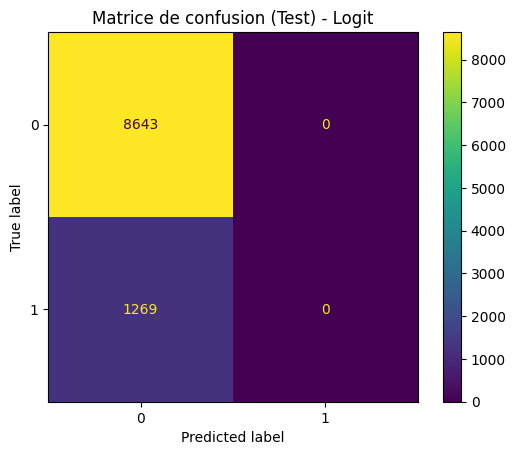

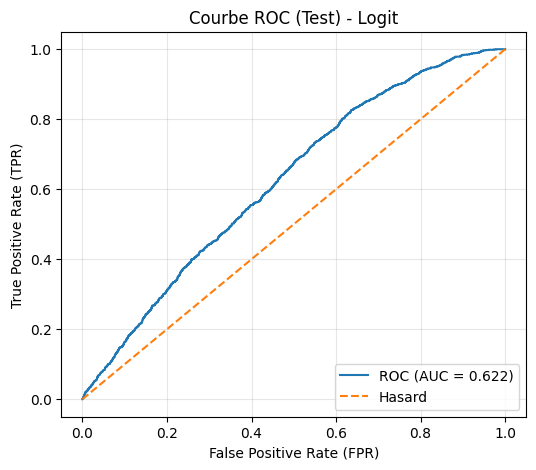

In [ ]:
# 1) Matrice de confusion
cm = confusion_matrix(y_test, pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title("Matrice de confusion (Test) - Logit")
plt.show()

# 2) Courbe ROC + AUC
fpr, tpr, thresholds = roc_curve(y_test, proba_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Hasard")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC (Test) - Logit")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()








**Avec re-équilibrage SUREMENT FAUX CA MODIFIE PROBA ? A VOIR CAR MODELE NUL ICI EN CLASSIFICATION**

In [ ]:
# 1) Target binaire
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# 2) Colonnes à exclure
columns_to_exclude = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "vh_model", "vh_make"]

# 3) X / y (ici on garde un dataframe avec les variables + la cible pour patsy)
df = freq_base.drop(columns=columns_to_exclude + ["claim_count"]).copy()
# df contient has_claim + toutes les variables utiles

# 4) Formule logit (patsy)
formula = (
    "has_claim ~ pol_bonus + C(pol_coverage) + C(pol_pay_freq) + C(pol_payd) + C(pol_usage) + "
    "drv_age1 + "
    "vh_age + C(vh_fuel) + C(vh_type) + vh_value"
)

# ==========================
# Repeated split + undersampling du TRAIN
# ==========================
R = 30   #(30 split)
test_size = 0.2
sss = StratifiedShuffleSplit(n_splits=R, test_size=test_size, random_state=42)
rus = RandomUnderSampler(random_state=42)

acc_list, auc_list, prec1_list, rec1_list = [], [], [], []

X_all = df.drop(columns=["has_claim"])
y_all = df["has_claim"].astype(int)

for i, (train_idx, test_idx) in enumerate(sss.split(X_all, y_all), 1):
    train_df = df.iloc[train_idx].copy()
    test_df  = df.iloc[test_idx].copy()

    # 1) Rééquilibrage du TRAIN : on tire des 0 pour avoir n0 = n1
    X_train = train_df.drop(columns=["has_claim"])
    y_train = train_df["has_claim"].astype(int)

    X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

    train_bal_df = X_train_bal.copy()
    train_bal_df["has_claim"] = y_train_bal

    # 2) Design matrices (train équilibré + test réel)
    y_train_m, X_train_m = dmatrices(formula, data=train_bal_df, return_type="dataframe")
    y_test_m,  X_test_m  = dmatrices(formula, data=test_df,      return_type="dataframe")

    # 3) Logit (GLM Binomial)
    logit_glm = sm.GLM(y_train_m, X_train_m, family=sm.families.Binomial()).fit()

    # 4) Probas + classes sur TEST
    proba_test = logit_glm.predict(X_test_m)
    pred_test  = (proba_test >= 0.5).astype(int)

    # 5) Métriques
    y_true = test_df["has_claim"].astype(int).values

    acc_list.append(accuracy_score(y_true, pred_test))
    auc_list.append(roc_auc_score(y_true, proba_test))
    prec1_list.append(precision_score(y_true, pred_test, zero_division=0))
    rec1_list.append(recall_score(y_true, pred_test, zero_division=0))

print(f"=== Logit (statsmodels) + undersampling, {R} splits ===")
print(f"Accuracy     mean={np.mean(acc_list):.3f} std={np.std(acc_list):.3f}")
print(f"ROC-AUC      mean={np.mean(auc_list):.3f} std={np.std(auc_list):.3f}")
print(f"Precision(1) mean={np.mean(prec1_list):.3f} std={np.std(prec1_list):.3f}")
print(f"Recall(1)    mean={np.mean(rec1_list):.3f} std={np.mean(rec1_list):.3f}")


=== Logit (statsmodels) + undersampling, 30 splits ===
Accuracy     mean=0.526 std=0.005
ROC-AUC      mean=0.625 std=0.008
Precision(1) mean=0.167 std=0.003
Recall(1)    mean=0.677 std=0.677


Amélioration du modèle.

### **1.4 Methode SVM**

Pour les SVM, l’article dit que sans calibration, les “probas” issues d’un SVM sont en général mauvaises, et la calibration améliore fortement.
Les SVM sont classés comme méthodes “maximum margin”. Ils ont une distorsion classique : ils repoussent la masse de probabilité loin de 0 et 1, ce qui crée des reliability diagrams en forme sigmoïde (en S).
pour visualiser, Dans l'article ils disent qu’ils ont “scalé” les sorties SVM dans [0,1] via min-max pour faire des histogrammes/diagrams — mais ça ne rend pas ça “calibré” pour autant.


Un SVM est un modèle de classification supervisée qui cherche une frontière qui sépare au mieux les deux classes (sinistre / pas sinistre).

Classification Report (Test) :
              precision    recall  f1-score   support

           0       0.91      0.53      0.67      8643
           1       0.17      0.64      0.26      1269

    accuracy                           0.55      9912
   macro avg       0.54      0.59      0.47      9912
weighted avg       0.81      0.55      0.62      9912

Accuracy: 0.545500403551251
ROC-AUC (avec score SVM): 0.6159730422237777


<Figure size 600x500 with 0 Axes>

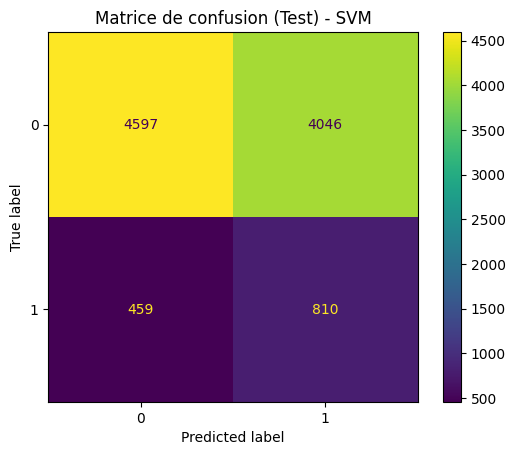

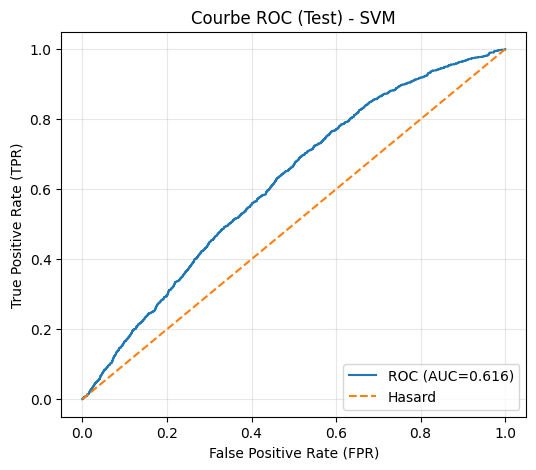

In [ ]:
# 1) Target binaire
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# 2) Colonnes à exclure
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "has_claim"]

# 3) X / y
X = freq_base.drop(columns=excluded_columns)
y = freq_base["has_claim"]

# 4) One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 5) Split (stratifié recommandé)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) SVM linéaire (rapide) + standardisation
# LinearSVC ne sort PAS predict_proba, mais on peut utiliser decision_function comme score pour ROC-AUC
svm_model = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),  # with_mean=False car one-hot -> sparse
    ("svm", LinearSVC(class_weight="balanced", random_state=42))
])

svm_model.fit(X_train, y_train)

# 7) Prédictions classes
y_pred = svm_model.predict(X_test)

# 8) Score continu (distance à l'hyperplan) -> utile pour ROC-AUC / ROC
y_score = svm_model.decision_function(X_test)

print("Classification Report (Test) :")
print(classification_report(y_test, y_pred, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC (avec score SVM):", roc_auc_score(y_test, y_score))

# 9) Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
plt.figure(figsize=(6, 5))
disp.plot(values_format="d")
plt.title("Matrice de confusion (Test) - SVM")
plt.show()

# 10) Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Hasard")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Courbe ROC (Test) - SVM")
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### **1.5 Methode Bayes**

Biais typique de NB (non calibré) : à cause de l’hypothèse (souvent fausse) d’indépendance conditionnelle des variables, NB a tendance à pousser les probabilités vers 0 et 1 (trop “sûr” de lui). Ça donne des reliability diagrams en “sigmoïde inversée”.

Platt scaling (sigmoïde) : peut aider, mais l’article dit clairement que la sigmoïde n’est pas la bonne forme pour corriger NB (puisque la distorsion est “inversée”).

Isotonic regression : meilleur choix pour NB, surtout quand tu as assez de données de calibration.

Même calibré, NB reste souvent un modèle moins bon que les meilleurs (ils disent que la calibration ne corrige pas “complètement” les modèles inférieurs comme NB).

 Un classifieur bayésien naïf suppose que l'existence d'une caractéristique pour une classe, est indépendante de l'existence d'autres caractéristiques.




NAIVE BAYES (classifieur bayésien naïf)

Le Naive Bayes est un modèle supervisé probabiliste : à partir des variables explicatives
F1, ..., Fn, (X dans le code) il estime la probabilité d’appartenir à une classe C (Y dans le code), c’est-à-dire :

p(C | F1, ..., Fn)

1) Théorème de Bayes
On part du théorème de Bayes :

p(C | F1, ..., Fn) ∝ p(C) * p(F1, ..., Fn | C)

- p(C) : probabilité a priori de la classe (fréquence de la classe)
- p(F1, ..., Fn | C) : vraisemblance (probabilité d’observer les caractéristiques sachant la classe)

2) Factorisation (règle en chaîne)
Sans hypothèse, on peut factoriser la vraisemblance :

p(F1, ..., Fn | C) = Π_{i=1..n} p(Fi | C, F1, ..., F_{i-1})

3) Hypothèse “naïve” : indépendance conditionnelle
L’hypothèse clé est que les caractéristiques sont indépendantes conditionnellement à la classe :

p(Fi | C, Fj) = p(Fi | C)   pour j ≠ i

Autrement dit : une fois la classe C connue, la valeur d’une caractéristique Fi ne dépend pas
des autres caractéristiques Fj.

Grâce à cette hypothèse, la vraisemblance devient :

p(F1, ..., Fn | C) = Π_{i=1..n} p(Fi | C)

4) Formule finale du classifieur Naive Bayes
On obtient donc :

p(C | F1, ..., Fn) = (1 / Z) * p(C) * Π_{i=1..n} p(Fi | C)

où Z est une constante de normalisation (pour que la somme des probabilités sur toutes les classes fasse 1).




In [ ]:
# 1) Target binaire
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# 2) Colonnes à exclure
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code",
                    "claim_count", "has_claim"]

# 3) X "brut" (AVANT dummies) + y
X_raw = freq_base.drop(columns=excluded_columns)
y = freq_base["has_claim"].astype(int)

# 4) On garde SEULEMENT les variables numériques d'origine
num_cols = X_raw.select_dtypes(include=[np.number]).columns
X_num = X_raw[num_cols].copy()

# 5) Sous-échantillons par classe
X0 = X_num[y == 0]
X1 = X_num[y == 1]

# 6) Corrélations par classe
corr0 = X0.corr()
corr1 = X1.corr()

threshold = 0.5

def top_strong_corr(corr, thr=0.5, topk=20):
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    s = upper.stack()  # Series index=(var1,var2)
    s_strong = s[s.abs() > thr].sort_values(key=lambda x: x.abs(), ascending=False)
    return len(s_strong), s_strong.head(topk)

n0, top0 = top_strong_corr(corr0, threshold, topk=20)
n1, top1 = top_strong_corr(corr1, threshold, topk=20)

print(f"Variables numériques utilisées ({len(num_cols)}):")
print(list(num_cols))

print(f"\nNombre de corrélations |corr| > {threshold} dans Y=0 : {n0}")
print("Top 20 corrélations fortes (Y=0) :")
print(top0)

print(f"\nNombre de corrélations |corr| > {threshold} dans Y=1 : {n1}")
print("Top 20 corrélations fortes (Y=1) :")
print(top1)


Variables numériques utilisées (14):
['pol_bonus', 'pol_duration', 'drv_age1', 'drv_age2', 'drv_age_lic1', 'drv_age_lic2', 'vh_age', 'vh_cyl', 'vh_din', 'vh_sale_begin', 'vh_sale_end', 'vh_speed', 'vh_value', 'vh_weight']

Nombre de corrélations |corr| > 0.5 dans Y=0 : 13
Top 20 corrélations fortes (Y=0) :
drv_age2       drv_age_lic2     0.963023
vh_age         vh_sale_begin    0.959146
               vh_sale_end      0.948941
vh_sale_begin  vh_sale_end      0.948044
drv_age1       drv_age_lic1     0.920409
vh_din         vh_value         0.886387
               vh_speed         0.809827
vh_cyl         vh_value         0.761582
               vh_weight        0.727566
vh_value       vh_weight        0.721355
vh_cyl         vh_din           0.710950
vh_speed       vh_value         0.638350
vh_din         vh_weight        0.615481
dtype: float64

Nombre de corrélations |corr| > 0.5 dans Y=1 : 13
Top 20 corrélations fortes (Y=1) :
drv_age2       drv_age_lic2     0.963002
vh_age         vh

On a bien pas d'indépendance entre les variables au sein d'une meme classe. Donc on peut déjà dire que l'hypothèse d'indépendance du modèle de Naive Bayes est fausse d'ou son appélation.

On a des variables continues et binaires (les catégorielles) On veut chercher une loi tels que on suppose que, dans chaque classe
Y=C chaque variables explicatives (Fi) suit cette loi choisit (avec des paramètres de la loi).

Fi sachant C suit cette loi.
	​


Le prior
𝑃
(
𝐶
)
, c’est juste la probabilité de la classe avant de regarder les variables
𝑋
Donc on prend le prior empirique.

P(c=1) = contrats avec sinistres / total contrat



Pour la vraisemblance, le Naive Bayes suppose que les variables explicatives sont indépendantes conditionnellement à la classe (indépendance des
Fi
 sachant C).
On choisit ensuite une forme de distribution pour
𝑃
(
Fi
∣
𝐶
)
 : une loi normale (GaussianNB) si les variables sont continues, ou une loi de Bernoulli (BernoulliNB) si les variables sont binaires (0/1, typiquement après one-hot encoding des variables catégorielles).

Dans notre cas, nous avons à la fois des variables continues et des variables catégorielles. Nous allons donc transformer les variables catégorielles en dummies. Pour pouvoir utiliser BernoulliNB, il faut que toutes les variables soient binaires : il faudra donc binariser aussi les variables continues (par exemple en les découpant en classes/intervalles puis en créant des indicateurs 0/1).

In [ ]:
# Colonnes "catégorielles" selon pandas
cat_cols = freq_base.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Colonnes numériques (continues ou discrètes)
num_cols = freq_base.select_dtypes(include=["number"]).columns.tolist()

print("=== Catégorielles (dtype object/category/bool) ===")
print(cat_cols)

print("\n=== Numériques (dtype number) ===")
print(num_cols)


=== Catégorielles (dtype object/category/bool) ===
['id_client', 'id_vehicle', 'id_policy', 'pol_coverage', 'pol_pay_freq', 'pol_payd', 'pol_usage', 'pol_insee_code', 'drv_drv2', 'drv_sex1', 'drv_sex2', 'vh_fuel', 'vh_make', 'vh_model', 'vh_type']

=== Numériques (dtype number) ===
['pol_bonus', 'pol_duration', 'drv_age1', 'drv_age2', 'drv_age_lic1', 'drv_age_lic2', 'vh_age', 'vh_cyl', 'vh_din', 'vh_sale_begin', 'vh_sale_end', 'vh_speed', 'vh_value', 'vh_weight', 'claim_count', 'has_claim']


Exemple : Discretisation des variables continues par quantiles puis elles sont transformées en dummies (on a une perte d'information donc cela n'est pas optimale).
On découpe les valeurs en K intervalles qui contiennent chacun le même nombre d’observations (quantiles). Puis on transforme en variables binaires. Par exemple n_bins = 4 on decoupe la variable en 4 catégories et chaque catégorie à le meme nombre d'observations.

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.79      0.84      8643
           1       0.18      0.31      0.23      1269

    accuracy                           0.73      9912
   macro avg       0.53      0.55      0.53      9912
weighted avg       0.80      0.73      0.76      9912

Accuracy: 0.7330508474576272
ROC-AUC : 0.6151851569210594
Confusion matrix:
 [[6870 1773]
 [ 873  396]]


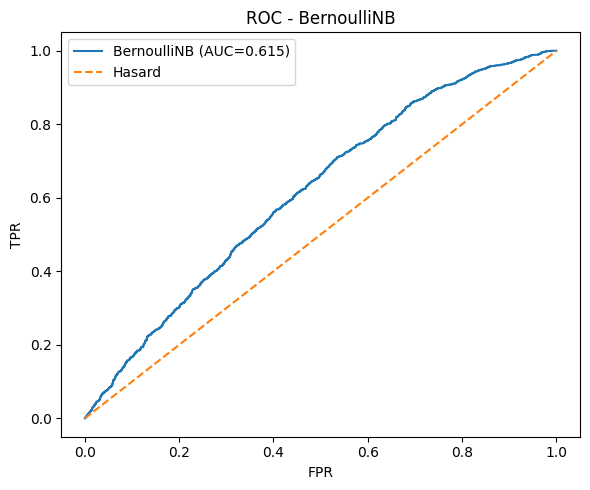

In [ ]:
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

excluded_bayes = [
    "id_client","id_vehicle","id_policy","pol_insee_code",
    "claim_count","has_claim","vh_make","vh_model"
]

df_bayes = freq_base.drop(columns=excluded_bayes, errors="ignore").copy()
y_bayes = freq_base["has_claim"].astype(int)

# Catégorielles / numériques (tes listes)
cat_cols_bayes = ["pol_coverage","pol_pay_freq","pol_payd","pol_usage","drv_drv2","drv_sex1","drv_sex2","vh_fuel","vh_type"]
num_cols_bayes = ["pol_bonus","pol_duration","drv_age1","drv_age2","drv_age_lic1","drv_age_lic2",
                  "vh_age","vh_cyl","vh_din","vh_sale_begin","vh_sale_end","vh_speed","vh_value","vh_weight"]

# garder seulement celles qui existent bien (sécurité)
cat_cols_bayes = [c for c in cat_cols_bayes if c in df_bayes.columns]
num_cols_bayes = [c for c in num_cols_bayes if c in df_bayes.columns]

X_bayes = df_bayes[cat_cols_bayes + num_cols_bayes].copy()

X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(
    X_bayes, y_bayes, test_size=0.2, random_state=42, stratify=y_bayes
)

# Préprocessing :
# - cat -> OneHot
# - num -> discretisation en bins puis OneHot (encode='onehot-dense' pour BernoulliNB)
preprocess_bayes = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_cols_bayes),
        ("num", KBinsDiscretizer(n_bins=5, encode="onehot-dense", strategy="quantile"), num_cols_bayes)
    ],
    remainder="drop"
)

model_bayes = Pipeline([
    ("prep", preprocess_bayes),
    ("nb", BernoulliNB())
])

model_bayes.fit(X_train_bayes, y_train_bayes)

proba_test_bayes = model_bayes.predict_proba(X_test_bayes)[:, 1]
pred_test_bayes  = model_bayes.predict(X_test_bayes)

print(classification_report(y_test_bayes, pred_test_bayes, zero_division=0))
print("Accuracy:", accuracy_score(y_test_bayes, pred_test_bayes))
print("ROC-AUC :", roc_auc_score(y_test_bayes, proba_test_bayes))
print("Confusion matrix:\n", confusion_matrix(y_test_bayes, pred_test_bayes))

fpr_bayes, tpr_bayes, _ = roc_curve(y_test_bayes, proba_test_bayes)
plt.figure(figsize=(6,5))
plt.plot(fpr_bayes, tpr_bayes, label=f"BernoulliNB (AUC={roc_auc_score(y_test_bayes, proba_test_bayes):.3f})")
plt.plot([0,1],[0,1],'--', label="Hasard")
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC - BernoulliNB")
plt.legend(); plt.tight_layout(); plt.show()


**ESSAYER AVEC LOI GAUSIENNE ?** https://fr.wikipedia.org/wiki/Classification_na%C3%AFve_bay%C3%A9sienne

**CONCLUSION**

On va faire nos analyses/tests sur SVM naives bayes, randomforest et XGboost (avec optimisation des paramètres) et GLM (sans modifs)

##**2 Tests de validité des probabilités**
La courbe de calibration, histograme, log-loss, Brier...

**Le reliability diagram** (diagramme de fiabilité) est l’outil visuel standard, et **l’idéal** est d’être proche de la diagonale y=x.

**Points sous la diagonale :**le modèle est trop confiant (il prédit trop haut).

**Points au-dessus :** le modèle est pas assez confiant (il prédit trop bas).

**Forme en S (sigmoïde) :** typique de certains modèles (SVM/boosting) avant calibration.

**Forme en S inversée :** typique de Naive Bayes (souvent trop extrême).

**Rappel article Reliability Diagram**



On compare :

1. **proba moyenne prédite dans le bin**
(Un bin : une classe ou une tranche) c’est un groupe d’observations qu’on met ensemble parce que leurs valeurs sont dans le même intervalle.)
par exemple : Bin 1 :
[0,0,1[ → toutes les prédictions entre 0% et 10%


2. **fréquence réelle de sinistres dans le bin**


**Et on regarde deux autres métriques :**


1.   Brier score (plus bas = mieux)
2.   Log-loss (plus bas = mieux)





**histogramme des prédictions** voir article a quoi ça doit ressembler avant calibration

### **2.1 RELIABILITY DIAGRAM NAIVES BAYES**

"naive bayes have the opposite bias and tend to push
predictions closer to 0 and 1" page 1 de l'article

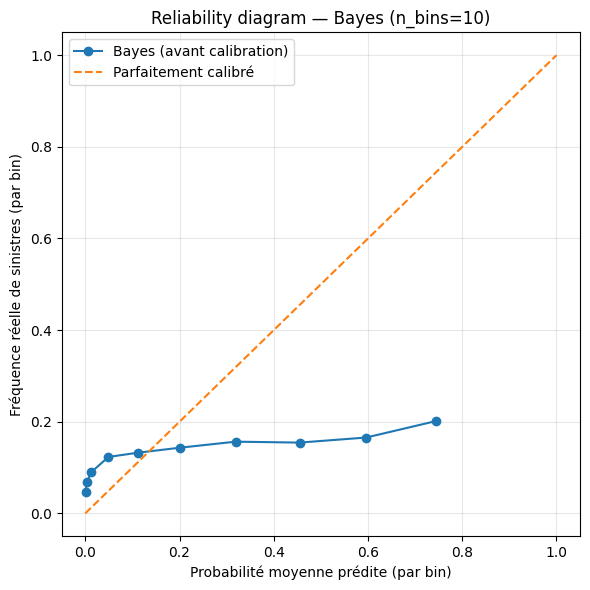

=== BAYES : Calibration (test) ===
Brier score (Bayes) : 0.17209981594731213
Log-loss (Bayes)    : 0.5563710705244874

=== BASELINE constante (test) ===
Brier score (baseline) : 0.11163581590738611
Log-loss (baseline)    : 0.3826181321892132

=== GAIN vs baseline (positif = mieux) ===
Δ Brier   : -0.060464000039926025
Δ Logloss : -0.17375293833527422

Bins (prob_pred -> prob_true) — Bayes :
Bin 01: proba_moy_pred=0.000  freq_reelle=0.046
Bin 02: proba_moy_pred=0.003  freq_reelle=0.068
Bin 03: proba_moy_pred=0.013  freq_reelle=0.090
Bin 04: proba_moy_pred=0.049  freq_reelle=0.123
Bin 05: proba_moy_pred=0.111  freq_reelle=0.132
Bin 06: proba_moy_pred=0.201  freq_reelle=0.143
Bin 07: proba_moy_pred=0.319  freq_reelle=0.156
Bin 08: proba_moy_pred=0.455  freq_reelle=0.154
Bin 09: proba_moy_pred=0.596  freq_reelle=0.165
Bin 10: proba_moy_pred=0.745  freq_reelle=0.202


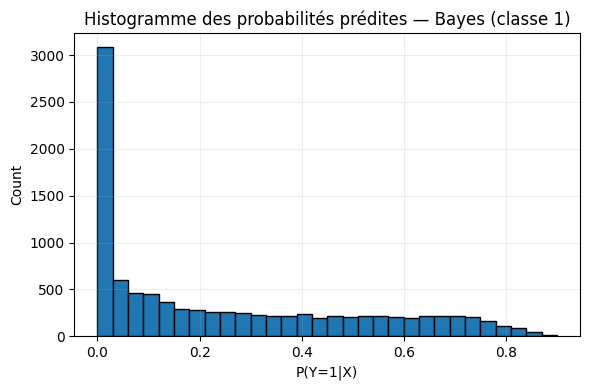

Quantiles probas (Bayes): [8.44363194e-05 2.77669990e-04 1.48127227e-01 7.38795254e-01
 8.18280983e-01]
Min/Max (Bayes): 2.854054388814898e-05 0.8993375549939344


In [ ]:
# ============================================================
# RELIABILITY DIAGRAM — BAYES (BernoulliNB)
# y_test_bayes : labels 0/1
# proba_test_bayes : P(Y=1|X) = model_bayes.predict_proba(X_test_bayes)[:,1]
# ============================================================

# Sécurité
y_test_bayes = np.asarray(y_test_bayes).astype(int)
proba_test_bayes = np.asarray(proba_test_bayes).astype(float).ravel()

# 1) Courbe de calibration
n_bins_bayes = 10
prob_true_bayes, prob_pred_bayes = calibration_curve(
    y_test_bayes,
    proba_test_bayes,
    n_bins=n_bins_bayes,
    strategy="quantile"
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred_bayes, prob_true_bayes, marker="o", label="Bayes (avant calibration)")
plt.plot([0, 1], [0, 1], "--", label="Parfaitement calibré")
plt.xlabel("Probabilité moyenne prédite (par bin)")
plt.ylabel("Fréquence réelle de sinistres (par bin)")
plt.title(f"Reliability diagram — Bayes (n_bins={n_bins_bayes})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2) Métriques de calibration
p0_bayes = float(np.mean(y_train_bayes))  # IMPORTANT : baseline apprise sur TRAIN
proba_baseline_bayes = np.full_like(y_test_bayes, p0_bayes, dtype=float)

brier_baseline_bayes = brier_score_loss(y_test_bayes, proba_baseline_bayes)
ll_baseline_bayes    = log_loss(y_test_bayes, proba_baseline_bayes)

brier_model_bayes = brier_score_loss(y_test_bayes, proba_test_bayes)
ll_model_bayes    = log_loss(y_test_bayes, proba_test_bayes)


print("=== BAYES : Calibration (test) ===")
print("Brier score (Bayes) :", brier_model_bayes)
print("Log-loss (Bayes)    :", ll_model_bayes)

print("\n=== BASELINE constante (test) ===")
print("Brier score (baseline) :", brier_baseline_bayes)
print("Log-loss (baseline)    :", ll_baseline_bayes)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_baseline_bayes - brier_model_bayes)
print("Δ Logloss :", ll_baseline_bayes - ll_model_bayes)

# 3) Afficher les bins
print("\nBins (prob_pred -> prob_true) — Bayes :")
for i, (pp, pt) in enumerate(zip(prob_pred_bayes, prob_true_bayes), 1):
    print(f"Bin {i:02d}: proba_moy_pred={pp:.3f}  freq_reelle={pt:.3f}")

# 4) Histogramme des probabilités
plt.figure(figsize=(6,4))
plt.hist(proba_test_bayes, bins=30, edgecolor="black")
plt.title("Histogramme des probabilités prédites — Bayes (classe 1)")
plt.xlabel("P(Y=1|X)")
plt.ylabel("Count")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 5) Résumé distribution
print("Quantiles probas (Bayes):", np.quantile(proba_test_bayes, [0.01, 0.05, 0.50, 0.95, 0.99]))
print("Min/Max (Bayes):", proba_test_bayes.min(), proba_test_bayes.max())


Pour une probabilité prédite de 0,7, la fréquence réelle observée est d’environ 0,2 : le modèle surestime donc fortement les probabilités. Cela correspond au comportement décrit dans le texte, où Naive Bayes tend à produire des probabilités trop extrêmes (trop proches de 0 ou de 1)

En ce qui concerne l'histograme : Gros pic près de 0 : pour une grande partie des individus, le modèle prédit une probabilité très faible d’être en classe 1.
On observe aussi une queue vers les valeurs élevées, indiquant qu’un sous-ensemble d’observations reçoit des probabilités importantes (jusqu’à 0,9) d'etre dans la classe 1, ce qui peut refléter une sur-confiance du modèle.

### **2.2 RELIABILITY DIAGRAM SVM**

**Bas de page 3 de l'article pour le re-scale du score en pseudo proba -> [0,1]**

"Returning to Figure 6, we see that the histograms of the pre
dicted values before calibration (first column) from the ten
different models display wide variation. The max margin
methods (SVM, boosted trees, and boosted stumps) have
the predicted values massed in the center of the histograms,
causing a sigmoidal shape in the reliability plots." **page 6 de l'article**

Score SVM min/max : -3.9414622985764645 1.3566413930835932
Score rescalé (0-1) quantiles: [0.46457355 0.58232267 0.7428495  0.80963711 0.84904629]


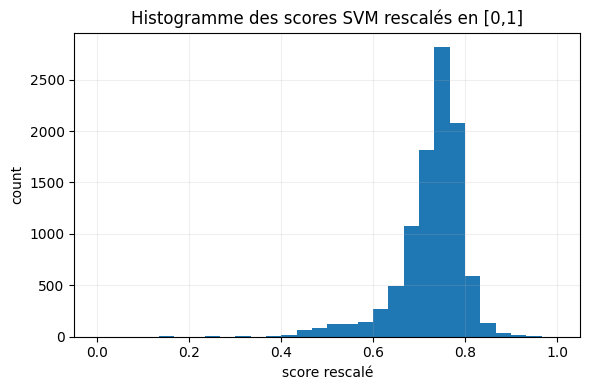

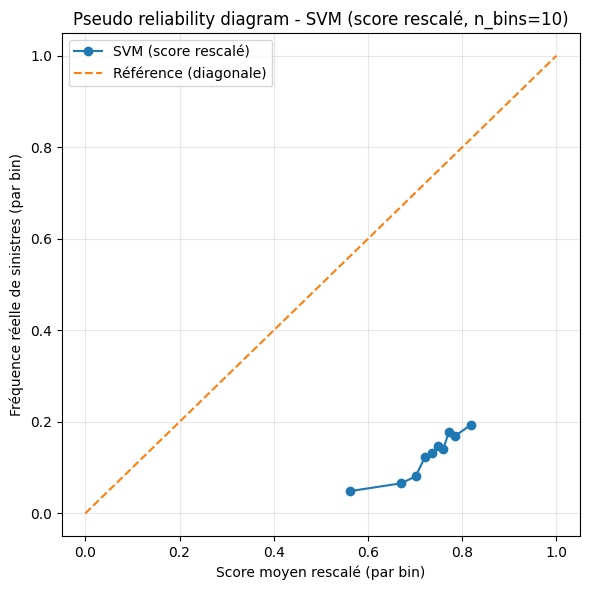


Bins (score_moy_rescalé -> freq_reelle):
Bin 01: score_moy=0.561  freq_reelle=0.048
Bin 02: score_moy=0.670  freq_reelle=0.066
Bin 03: score_moy=0.701  freq_reelle=0.081
Bin 04: score_moy=0.721  freq_reelle=0.124
Bin 05: score_moy=0.736  freq_reelle=0.132
Bin 06: score_moy=0.749  freq_reelle=0.147
Bin 07: score_moy=0.760  freq_reelle=0.141
Bin 08: score_moy=0.772  freq_reelle=0.178
Bin 09: score_moy=0.786  freq_reelle=0.170
Bin 10: score_moy=0.818  freq_reelle=0.194

=== SVM (score rescalé) : Calibration (test) ===
p0 (train prevalence): 0.12800141242937854
Brier score (SVM) : 0.4705489513960216
Log-loss (SVM)    : 1.1914660449632386

=== BASELINE constante (test) ===
Baseline Brier   : 0.11163581590738611
Baseline Log-loss: 0.3826181321892132

=== GAIN vs baseline (positif = mieux) ===
Δ Brier   : -0.35891313548863546
Δ Logloss : -0.8088479127740253


In [ ]:
# 1) Target binaire
freq_base["has_claim"] = (freq_base["claim_count"] > 0).astype(int)

# 2) Colonnes à exclure
excluded_columns = ["id_client", "id_vehicle", "id_policy", "pol_insee_code", "claim_count", "has_claim"]

# 3) X / y
X = freq_base.drop(columns=excluded_columns, errors="ignore")
y = freq_base["has_claim"].astype(int)

# 4) One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 5) Split (stratifié)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 6) SVM linéaire + standardisation
svm_model = Pipeline([
    ("scaler", StandardScaler(with_mean=False)),
    ("svm", LinearSVC(class_weight="balanced", random_state=42))
])

svm_model.fit(X_train, y_train)

# 7) Prédictions classes
y_pred = svm_model.predict(X_test)

# 8) Score continu
y_score = svm_model.decision_function(X_test)


# 9) RESCALE DU SCORE SVM EN [0,1] (min-max scaling)
smin, smax = y_score.min(), y_score.max()
if np.isclose(smax - smin, 0):
    y_score_01 = np.zeros_like(y_score, dtype=float)
else:
    y_score_01 = (y_score - smin) / (smax - smin)

print("Score SVM min/max :", smin, smax)
print("Score rescalé (0-1) quantiles:", np.quantile(y_score_01, [0.01, 0.05, 0.5, 0.95, 0.99]))

# 10) Histogramme des scores rescalés
plt.figure(figsize=(6, 4))
plt.hist(y_score_01, bins=30)
plt.title("Histogramme des scores SVM rescalés en [0,1]")
plt.xlabel("score rescalé")
plt.ylabel("count")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 13) PSEUDO reliability diagram (sur score rescalé)
# Attention : ce n'est PAS une vraie calibration proba,
# c'est juste pour voir si la relation est en S.

n_bins = 10
prob_true, prob_pred = calibration_curve(y_test, y_score_01, n_bins=n_bins, strategy="quantile")

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker="o", label="SVM (score rescalé)")
plt.plot([0, 1], [0, 1], "--", label="Référence (diagonale)")
plt.xlabel("Score moyen rescalé (par bin)")
plt.ylabel("Fréquence réelle de sinistres (par bin)")
plt.title(f"Pseudo reliability diagram - SVM (score rescalé, n_bins={n_bins})")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# (option) afficher les points bins
print("\nBins (score_moy_rescalé -> freq_reelle):")
for i, (pp, pt) in enumerate(zip(prob_pred, prob_true), 1):
    print(f"Bin {i:02d}: score_moy={pp:.3f}  freq_reelle={pt:.3f}")



# 2) Métriques de calibration
p0_svm = float(np.mean(y_train))
proba_baseline_svm = np.full_like(y_test, p0_svm, dtype=float)

brier_baseline_svm = brier_score_loss(y_test, proba_baseline_svm)
ll_baseline_svm    = log_loss(y_test, proba_baseline_svm)

brier_svm = brier_score_loss(y_test, y_score_01)
ll_svm    = log_loss(y_test, y_score_01)

print("\n=== SVM (score rescalé) : Calibration (test) ===")
print("p0 (train prevalence):", p0_svm)
print("Brier score (SVM) :", brier_svm)
print("Log-loss (SVM)    :", ll_svm)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_baseline_svm)
print("Baseline Log-loss:", ll_baseline_svm)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_baseline_svm - brier_svm)
print("Δ Logloss :", ll_baseline_svm - ll_svm)


Pseudo probabilités plutôt centralisées (pas proches de 0 ou de 1) entre 0.5 et 0.8; quand on “prédit” 0.7–0.8, la fréquence réelle est ~0.12–0.20 → courbe très en dessous de la diagonale. Sur-confiant, prédit trop haut. Pour les probabilité réels/fréquence réels elevés, sous estimation des probabilités prédites.

Forme sigmoide, masse au centre. (typique SVM)

**Normal d'avoir des métriques très mauvaises car le re scaling n'est pas vraiment une probabilité**

### **2.3 RELIABILITY DIAGRAM RandomForest**

Pour le Random Forest, c'est différent. Contrairement au SVM, le Random Forest possède une méthode : .predict_proba() native. Il n'y a donc pas besoin de faire un Min-Max scaling manuel.

Cependant, comme le souligne l'article, le Random Forest a son propre biais : il a du mal à prédire des probabilités proches de 0 ou 1 (car c'est une moyenne de plusieurs arbres, et il est rare que tous les arbres tombent d'accord sur un 0 absolu ou un 1 absolu).

**ATTENTION FAIRE LE DIAGRAM EN FONCTION DU BON MODELE CHOISIT POUR LE RANDOMFOREST (VOIR SECTION 1)**

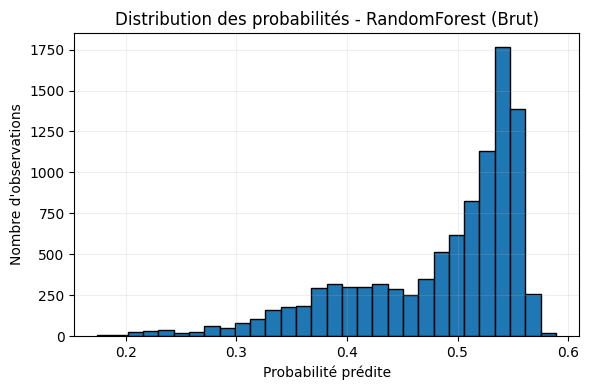

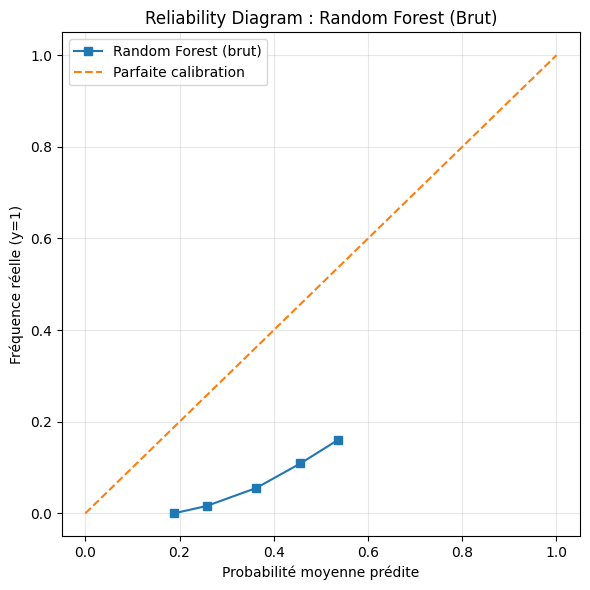


=== RF (brut) : Calibration (test) ===
p0 (train prevalence): 0.12800141242937854
Brier score (RF) : 0.23667317976998717
Log-loss (RF)    : 0.6649187805459462

=== BASELINE constante (test) ===
Baseline Brier   : 0.11163581590738611
Baseline Log-loss: 0.3826181321892132

=== GAIN vs baseline (positif = mieux) ===
Δ Brier   : -0.12503736386260106
Δ Logloss : -0.282300648356733


In [ ]:
#CODE ALICE

# 1) Modèle = meilleur RF trouvé par RandomizedSearchCV
rf_model = best_rf_clf

# 2) Probabilités brutes (classe 1)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 3) Histogramme des probabilités
plt.figure(figsize=(6, 4))
plt.hist(y_proba_rf, bins=30, edgecolor='black')
plt.title("Distribution des probabilités - RandomForest (Brut)")
plt.xlabel("Probabilité prédite")
plt.ylabel("Nombre d'observations")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 4) Reliability diagram
prob_true_rf, prob_pred_rf = calibration_curve(
    y_test, y_proba_rf,
    n_bins=10,
    strategy="uniform"   # tu peux mettre "quantile" si classe très rare
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred_rf, prob_true_rf, marker="s", label="Random Forest (brut)")
plt.plot([0, 1], [0, 1], "--", label="Parfaite calibration")
plt.xlabel("Probabilité moyenne prédite")
plt.ylabel("Fréquence réelle (y=1)")
plt.title("Reliability Diagram : Random Forest (Brut)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Métriques de calibration
p0_rf = float(np.mean(y_train))  # prévalence sur TRAIN
proba_baseline_rf = np.full_like(y_test, p0_rf, dtype=float)

brier_baseline_rf = brier_score_loss(y_test, proba_baseline_rf)
ll_baseline_rf    = log_loss(y_test, proba_baseline_rf)

brier_rf = brier_score_loss(y_test, y_proba_rf)
ll_rf    = log_loss(y_test, y_proba_rf)

print("\n=== RF (brut) : Calibration (test) ===")
print("p0 (train prevalence):", p0_rf)
print("Brier score (RF) :", brier_rf)
print("Log-loss (RF)    :", ll_rf)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_baseline_rf)
print("Baseline Log-loss:", ll_baseline_rf)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_baseline_rf - brier_rf)
print("Δ Logloss :", ll_baseline_rf - ll_rf)



**CODE CLARA OU TEO SUREMENT FAUT CAR N UTILISE PAS LE MEILLEUR MODELE DE RANDOMFOREST**

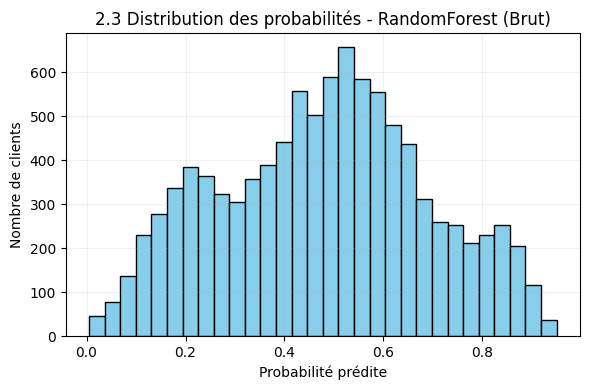

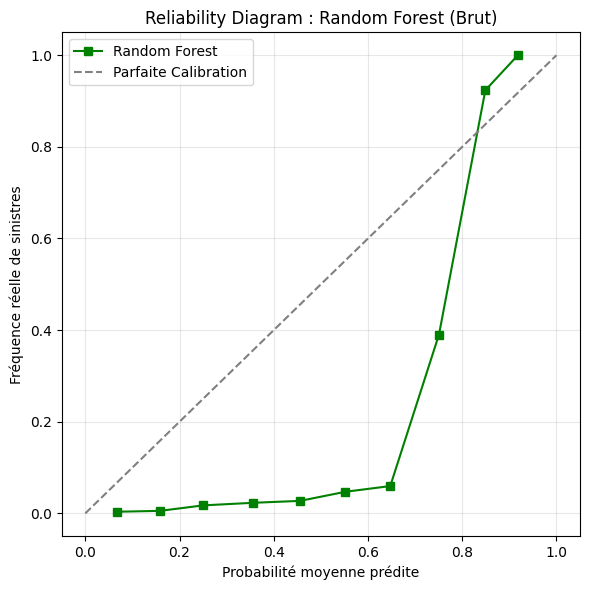

--- Métriques de Calibration (RF) ---
Brier Score : 0.2050
Log-loss    : 0.5875


In [ ]:
# 1. Calcul des probabilités pour la classe positive (1 = sinistre)
# On utilise le modèle rf_clf précédent
rf_model = rf_clf

# 2) Récupération des VRAIES probabilités (pas besoin de rescale ici)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 3) Histogramme des probabilités
plt.figure(figsize=(6, 4))
plt.hist(y_proba_rf, bins=30, color='skyblue', edgecolor='black')
plt.title("2.3 Distribution des probabilités - RandomForest (Brut)")
plt.xlabel("Probabilité prédite")
plt.ylabel("Nombre de clients")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 4) Reliability Diagram RandomForest
prob_true_rf, prob_pred_rf = calibration_curve(y_test, y_proba_rf, n_bins=10, strategy="uniform")

plt.figure(figsize=(6, 6))
plt.plot(prob_pred_rf, prob_true_rf, marker="s", color="green", label="Random Forest")
plt.plot([0, 1], [0, 1], "--", color="gray", label="Parfaite Calibration")
plt.xlabel("Probabilité moyenne prédite")
plt.ylabel("Fréquence réelle de sinistres")
plt.title("Reliability Diagram : Random Forest (Brut)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5) Métriques de calibration
print(f"--- Métriques de Calibration (RF) ---")
print(f"Brier Score : {brier_score_loss(y_test, y_proba_rf):.4f}")
print(f"Log-loss    : {log_loss(y_test, y_proba_rf):.4f}")

### **2.4 RELIABILITY DIAGRAM XGboost**

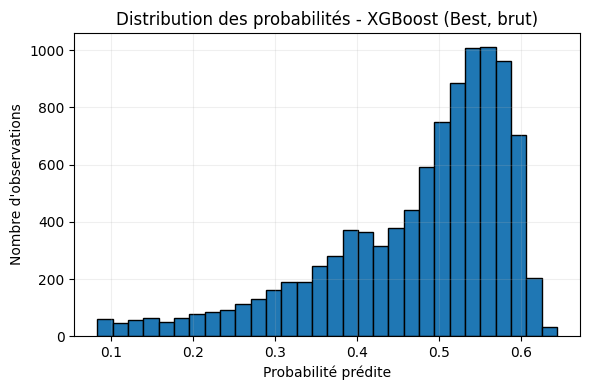

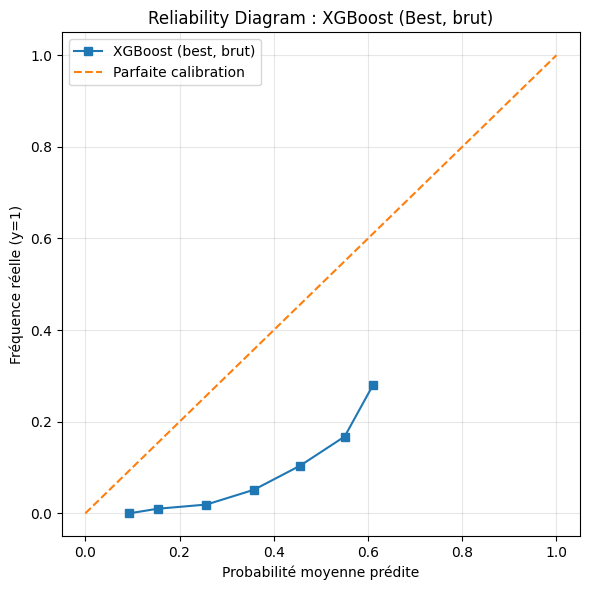


=== XGBoost (best, brut) : Calibration (test) ===
p0 (train prevalence): 0.12800141242937854
Brier score (XGB) : 0.23073097042407856
Log-loss (XGB)    : 0.6496647094896973

=== BASELINE constante (test) ===
Baseline Brier   : 0.11163581590738611
Baseline Log-loss: 0.3826181321892132

=== GAIN vs baseline (positif = mieux) ===
Δ Brier   : -0.11909515451669245
Δ Logloss : -0.26704657730048414


In [ ]:
#CODE ALICE


# 1) Probabilités brutes (classe 1)
y_class_proba = best_xgb_clf.predict_proba(X_test)[:, 1]


# 1) Probabilités brutes (classe 1)
y_proba_xgb = best_xgb_clf.predict_proba(X_test)[:, 1]

# 2) Histogramme des probabilités
plt.figure(figsize=(6, 4))
plt.hist(y_proba_xgb, bins=30, edgecolor='black')
plt.title("Distribution des probabilités - XGBoost (Best, brut)")
plt.xlabel("Probabilité prédite")
plt.ylabel("Nombre d'observations")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 3) Reliability diagram
prob_true_xgb, prob_pred_xgb = calibration_curve(
    y_test, y_proba_xgb,
    n_bins=10,
    strategy="uniform"   # mets "quantile" si la classe 1 est très rare
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred_xgb, prob_true_xgb, marker="s", label="XGBoost (best, brut)")
plt.plot([0, 1], [0, 1], "--", label="Parfaite calibration")
plt.xlabel("Probabilité moyenne prédite")
plt.ylabel("Fréquence réelle (y=1)")
plt.title("Reliability Diagram : XGBoost (Best, brut)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4) Métriques de calibration
p0_xgb = float(np.mean(y_train))  # prévalence sur TRAIN
proba_baseline_xgb = np.full_like(y_test, p0_xgb, dtype=float)

brier_baseline_xgb = brier_score_loss(y_test, proba_baseline_xgb)
ll_baseline_xgb    = log_loss(y_test, proba_baseline_xgb)

brier_xgb = brier_score_loss(y_test, y_proba_xgb)
ll_xgb    = log_loss(y_test, y_proba_xgb)

print("\n=== XGBoost (best, brut) : Calibration (test) ===")
print("p0 (train prevalence):", p0_xgb)
print("Brier score (XGB) :", brier_xgb)
print("Log-loss (XGB)    :", ll_xgb)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_baseline_xgb)
print("Baseline Log-loss:", ll_baseline_xgb)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_baseline_xgb - brier_xgb)
print("Δ Logloss :", ll_baseline_xgb - ll_xgb)




**CODE CLARA OU TEO MARCHE PAS**

In [ ]:
# 1) Modèle XGBoost
# On utilise les mêmes données balancées que pour le RF
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)

# 2) Récupération des probabilités
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 3) Calcul des métriques
print(f"--- Métriques XGBoost (Brut) ---")
print(f"Brier Score : {brier_score_loss(y_test, y_proba_xgb):.4f}")
print(f"Log-loss    : {log_loss(y_test, y_proba_xgb):.4f}")

# 4) Reliability Diagram
prob_true_xgb, prob_pred_xgb = calibration_curve(y_test, y_proba_xgb, n_bins=10, strategy="uniform")

plt.figure(figsize=(6, 6))
plt.plot(prob_pred_xgb, prob_true_xgb, marker="x", color="orange", label="XGBoost")
plt.plot([0, 1], [0, 1], "--", color="gray", label="Parfaite Calibration")
plt.xlabel("Probabilité moyenne prédite")
plt.ylabel("Fréquence réelle de sinistres")
plt.title("2.4 Reliability Diagram : XGBoost (Brut)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

NameError: name 'xgb' is not defined

Le Boosting a tendance à produire des probabilités qui "s'écrasent" vers 0 et 1 ou qui forment une sigmoïde.

### **2.5 RELIABILITY DIAGRAM LOIGISTIC REGRESSION**

La théorie dit qu'il doit être sur la diagonale. Elle prouve que le problème de calibration vient de la structure des algorithmes et non des données.

In [ ]:
#CODE ALICE

# 1) Probabilités brutes du GLM (déjà calculées)
y_proba_logit = proba_test  # P(Y=1|X)  #celui calculé dans le premier modèle.

# 2) Histogramme des probabilités
plt.figure(figsize=(6, 4))
plt.hist(y_proba_logit, bins=5, edgecolor='black')
plt.title("Distribution des probabilités - Logit GLM (Brut)")
plt.xlabel("Probabilité prédite")
plt.ylabel("Nombre d'observations")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 3) Reliability diagram
prob_true_logit, prob_pred_logit = calibration_curve(
    y_test, y_proba_logit,
    n_bins=10,
    strategy="uniform"   # ou "quantile" si classe 1 très rare
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred_logit, prob_true_logit, marker="s", label="Logit GLM (brut)")
plt.plot([0, 1], [0, 1], "--", label="Parfaite calibration")
plt.xlabel("Probabilité moyenne prédite")
plt.ylabel("Fréquence réelle (y=1)")
plt.title("Reliability Diagram : Logit GLM (Brut)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4) Métriques de calibration
p0_glm = float(np.mean(y_train))  # prévalence sur TRAIN
proba_baseline_glm = np.full_like(y_test, p0_glm, dtype=float)

brier_baseline_glm = brier_score_loss(y_test, proba_baseline_glm)
ll_baseline_glm    = log_loss(y_test, proba_baseline_glm)

brier_glm = brier_score_loss(y_test, y_proba_logit)
ll_glm    = log_loss(y_test, y_proba_logit)

print("\n=== GLM Logit (brut) : Calibration (test) ===")
print("p0 (train prevalence):", p0_glm)
print("Brier score (GLM) :", brier_glm)
print("Log-loss (GLM)    :", ll_glm)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_baseline_glm)
print("Baseline Log-loss:", ll_baseline_glm)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_baseline_glm - brier_glm)
print("Δ Logloss :", ll_baseline_glm - ll_glm)


Au debut proche de la diagonal donc pas mal

CODE CLARA OU TEO faux car pas utilisé le code du GLM

In [ ]:
# 1) Modèle Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# 2) Récupération des probabilités
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# 3) Métriques
print(f"--- Métriques Logistic Regression ---")
print(f"Brier Score : {brier_score_loss(y_test, y_proba_lr):.4f}")
print(f"Log-loss    : {log_loss(y_test, y_proba_lr):.4f}")

# 4) Reliability Diagram
prob_true_lr, prob_pred_lr = calibration_curve(y_test, y_proba_lr, n_bins=10, strategy="uniform")

plt.figure(figsize=(6, 6))
plt.plot(prob_pred_lr, prob_true_lr, marker="v", color="red", label="Logistic Regression")
plt.plot([0, 1], [0, 1], "--", color="gray", label="Parfaite Calibration")
plt.xlabel("Probabilité moyenne prédite")
plt.ylabel("Fréquence réelle de sinistres")
plt.title("2.5 Reliability Diagram : Logistic Regression")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

1. naives baes
Brier score : 0.17209981594731213
Log-loss    : 0.5563710705244874

2. SVM
Brier score : 0.4705489513960216
Log-loss    : 1.1914660449632386
3. RF
Brier Score : 0.2367
Log-loss    : 0.6649
4. XGboost
Brier Score : 0.2307
Log-loss    : 0.6497
5. glm
Brier Score : 0.1721
Log-loss    : 0.5564

**CONCLUSION reliability diagram** ;

1. GLM : courbe presque sur la diagonale → probabilités globalement bien calibrées.

2. Naive Bayes : surconfiance → probabilités trop extrêmes / trop élevées par rapport aux fréquences observées.

3. SVM : scores massés au centre car ce n’est pas une vraie probabilité (score rescalé), donc calibration nécessaire pour obtenir des p

4. XGBoost et Random Forest : courbe sous la diagonale → surconfiance (probabilités surestimées).


**CONCLUSION métriques/comparaison baseline** ;

1. GLM (logit) : le seul au-dessus de la baseline → probas déjà bien calibrées, gain léger.

2. Naive Bayes : pire que baseline → probas pas fiables, à écarter.

3. SVM (score min-max) : très pire → ce n’est pas une proba ; à refaire avec Platt/isotonic.

4. Random Forest (brut) : pire que baseline → probas brutes inutilisables ; à tester après calibration.

5. XGBoost (brut) : pire que baseline → même conclusion ; à tester après calibration.

##**3 Platt Scaling/Isotonic Regression**




### **Méthode**

< ~**1 000 obs de calibration → plutôt sigmoid → Platt**

≥ ~**1 000 → isotonic**

Tester les deux.

**SVM :** presque toujours à calibrer si on veux des vrais probabilités.

**Boosting / XGBoost :** souvent utile de tester puis calibrer.

**Random Forest :** parfois ok, parfois non → teste, calibre si courbe en S / probas “trop centrées”.

**Régression logistique (GLM logit) :** souvent déjà bien calibrée → calibration pas toujours nécessaire, mais vérifie.

**Naive Bayes :** presque toujours à calibrer si tu veux des probabilités utilisables (il est souvent trop “confiant” → probas trop proches de 0 et 1).


**Train :** entraînes le modèle (RF, XGBoost, SVM, etc.) sur train.

**Calibration :** on crée un jeu de données indépendant (jeu de calibration). On y prédit des scores / probabilités s avec le modèle (qu’ils soient bien ou mal calibrés). Puis on ajuste un calibrateur, c’est-à-dire une fonction g(s), qui transforme ces scores en probabilités calibrées, de sorte que la valeur prédite corresponde à une fréquence observée (ex. parmi les cas à 0,30, on observe ~30% d’événements)

**Test :** tu évalues (Brier, log-loss, reliability diagram) sur test.

### **Platt Scaling/Isonic Regression SVM**

#### Platt Scaling SVM

In [ ]:

# ============================================================
# CALIBRATION SVM — PLATT SCALING (sigmoid)
# ============================================================

# 1) Calibration (Platt = sigmoid), CV interne sur le TRAIN
svm_platt = CalibratedClassifierCV(
    estimator=svm_model,   # ton pipeline scaler + LinearSVC
    method="sigmoid",
    cv=5
)

svm_platt.fit(X_train, y_train)

# 2) Probabilités calibrées sur TEST
proba_test_svm_platt = svm_platt.predict_proba(X_test)[:, 1]

# 3) Reliability diagram
n_bins = 10
prob_true, prob_pred = calibration_curve(
    y_test, proba_test_svm_platt, n_bins=n_bins, strategy="quantile"
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker="o", label="SVM calibré (Platt)")
plt.plot([0, 1], [0, 1], "--", label="Parfaitement calibré")
plt.xlabel("Probabilité moyenne prédite (par bin)")
plt.ylabel("Fréquence réelle (par bin)")
plt.title(f"Reliability diagram — SVM calibré (Platt), n_bins={n_bins}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4) Métriques + baseline + gains
p0 = float(np.mean(y_train))
proba_baseline = np.full_like(y_test, p0, dtype=float)

brier_model = brier_score_loss(y_test, proba_test_svm_platt)
ll_model    = log_loss(y_test, proba_test_svm_platt)

brier_base = brier_score_loss(y_test, proba_baseline)
ll_base    = log_loss(y_test, proba_baseline)

print("\n=== SVM calibré (Platt) : Calibration (test) ===")
print("p0 (train prevalence):", p0)
print("Brier score (SVM Platt):", brier_model)
print("Log-loss (SVM Platt)   :", ll_model)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_base)
print("Baseline Log-loss:", ll_base)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_base - brier_model)
print("Δ Logloss :", ll_base - ll_model)

# (optionnel) histogramme des probas calibrées
plt.figure(figsize=(6, 4))
plt.hist(proba_test_svm_platt, bins=30, edgecolor="black")
plt.title("Histogramme des probabilités — SVM calibré (Platt)")
plt.xlabel("P(Y=1|X)")
plt.ylabel("Count")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Après Platt, SVM fournit des probabilités bien calibrées, et améliore la baseline.

#### Isonic Regression SVM

In [ ]:
# ============================================================
# CALIBRATION SVM — ISOTONIC REGRESSION
# ============================================================

svm_iso = CalibratedClassifierCV(
    estimator=svm_model,   # ton pipeline scaler + LinearSVC
    method="isotonic",
    cv=5
)

svm_iso.fit(X_train, y_train)

proba_test_svm_iso = svm_iso.predict_proba(X_test)[:, 1]

# Reliability diagram
n_bins = 10
prob_true, prob_pred = calibration_curve(
    y_test, proba_test_svm_iso, n_bins=n_bins, strategy="quantile"
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker="o", label="SVM calibré (Isotonic)")
plt.plot([0, 1], [0, 1], "--", label="Parfaitement calibré")
plt.xlabel("Probabilité moyenne prédite (par bin)")
plt.ylabel("Fréquence réelle (par bin)")
plt.title(f"Reliability diagram — SVM calibré (Isotonic), n_bins={n_bins}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Métriques + baseline + gains
p0 = float(np.mean(y_train))
proba_baseline = np.full_like(y_test, p0, dtype=float)

brier_model = brier_score_loss(y_test, proba_test_svm_iso)
ll_model    = log_loss(y_test, proba_test_svm_iso)

brier_base = brier_score_loss(y_test, proba_baseline)
ll_base    = log_loss(y_test, proba_baseline)

print("\n=== SVM calibré (Isotonic) : Calibration (test) ===")
print("p0 (train prevalence):", p0)
print("Brier score (SVM Iso):", brier_model)
print("Log-loss (SVM Iso)   :", ll_model)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_base)
print("Baseline Log-loss:", ll_base)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_base - brier_model)
print("Δ Logloss :", ll_base - ll_model)

# (optionnel) histogramme des probas calibrées
plt.figure(figsize=(6, 4))
plt.hist(proba_test_svm_iso, bins=30, edgecolor="black")
plt.title("Histogramme des probabilités — SVM calibré (Isotonic)")
plt.xlabel("P(Y=1|X)")
plt.ylabel("Count")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


Donc Isotonic bat la baseline et fait mieux que SVM Platt.

### **Platt Scaling et Isonic Regression NAIVES BAYES**

#### Platt Scaling NAIVES BAYES

In [ ]:
# ============================================================
# CALIBRATION — NAIVE BAYES (BernoulliNB) : PLATT (sigmoid)
# ============================================================

# 1) Calibrateur (Platt) avec CV sur le TRAIN
bayes_platt = CalibratedClassifierCV(
    estimator=model_bayes,   # ton pipeline preprocess + BernoulliNB
    method="sigmoid",
    cv=5
)

bayes_platt.fit(X_train_bayes, y_train_bayes)

# 2) Probabilités calibrées sur TEST
proba_test_bayes_platt = bayes_platt.predict_proba(X_test_bayes)[:, 1]

# 3) Reliability diagram
n_bins = 10
prob_true, prob_pred = calibration_curve(
    y_test_bayes, proba_test_bayes_platt, n_bins=n_bins, strategy="quantile"
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker="o", label="Bayes calibré (Platt)")
plt.plot([0, 1], [0, 1], "--", label="Parfaitement calibré")
plt.xlabel("Probabilité moyenne prédite (par bin)")
plt.ylabel("Fréquence réelle (par bin)")
plt.title(f"Reliability diagram — Bayes calibré (Platt), n_bins={n_bins}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4) Métriques + baseline + gains
p0 = float(np.mean(y_train_bayes))
proba_baseline = np.full_like(y_test_bayes, p0, dtype=float)

brier_model = brier_score_loss(y_test_bayes, proba_test_bayes_platt)
ll_model    = log_loss(y_test_bayes, proba_test_bayes_platt)

brier_base = brier_score_loss(y_test_bayes, proba_baseline)
ll_base    = log_loss(y_test_bayes, proba_baseline)

print("\n=== Bayes calibré (Platt) : Calibration (test) ===")
print("p0 (train prevalence):", p0)
print("Brier score (Bayes Platt):", brier_model)
print("Log-loss (Bayes Platt)   :", ll_model)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_base)
print("Baseline Log-loss:", ll_base)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_base - brier_model)
print("Δ Logloss :", ll_base - ll_model)

# (optionnel) histogramme
plt.figure(figsize=(6, 4))
plt.hist(proba_test_bayes_platt, bins=30, edgecolor="black")
plt.title("Histogramme des probabilités — Bayes calibré (Platt)")
plt.xlabel("P(Y=1|X)")
plt.ylabel("Count")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


ses probabilités deviennent bien plus cohérentes et surpassent légèrement la baseline.

#### Isonic Regression NAIVES BAYES

In [ ]:
# ============================================================
# CALIBRATION — NAIVE BAYES (BernoulliNB) : ISOTONIC
# ============================================================

bayes_iso = CalibratedClassifierCV(
    estimator=model_bayes,   # ton pipeline preprocess + BernoulliNB
    method="isotonic",
    cv=5
)

bayes_iso.fit(X_train_bayes, y_train_bayes)

# Probabilités calibrées sur TEST
proba_test_bayes_iso = bayes_iso.predict_proba(X_test_bayes)[:, 1]

# Reliability diagram
n_bins = 10
prob_true, prob_pred = calibration_curve(
    y_test_bayes, proba_test_bayes_iso, n_bins=n_bins, strategy="quantile"
)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker="o", label="Bayes calibré (Isotonic)")
plt.plot([0, 1], [0, 1], "--", label="Parfaitement calibré")
plt.xlabel("Probabilité moyenne prédite (par bin)")
plt.ylabel("Fréquence réelle (par bin)")
plt.title(f"Reliability diagram — Bayes calibré (Isotonic), n_bins={n_bins}")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Métriques + baseline + gains
p0 = float(np.mean(y_train_bayes))
proba_baseline = np.full_like(y_test_bayes, p0, dtype=float)

brier_model = brier_score_loss(y_test_bayes, proba_test_bayes_iso)
ll_model    = log_loss(y_test_bayes, proba_test_bayes_iso)

brier_base = brier_score_loss(y_test_bayes, proba_baseline)
ll_base    = log_loss(y_test_bayes, proba_baseline)

print("\n=== Bayes calibré (Isotonic) : Calibration (test) ===")
print("p0 (train prevalence):", p0)
print("Brier score (Bayes Iso):", brier_model)
print("Log-loss (Bayes Iso)   :", ll_model)

print("\n=== BASELINE constante (test) ===")
print("Baseline Brier   :", brier_base)
print("Baseline Log-loss:", ll_base)

print("\n=== GAIN vs baseline (positif = mieux) ===")
print("Δ Brier   :", brier_base - brier_model)
print("Δ Logloss :", ll_base - ll_model)

# (optionnel) histogramme
plt.figure(figsize=(6, 4))
plt.hist(proba_test_bayes_iso, bins=30, edgecolor="black")
plt.title("Histogramme des probabilités — Bayes calibré (Isotonic)")
plt.xlabel("P(Y=1|X)")
plt.ylabel("Count")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


##**4 Choix/Résultats/Conclusion**